In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [3]:
from scipy.stats.mstats import winsorize

In [4]:
df = pd.read_csv('final_merged.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17789 entries, 0 to 17788
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              17789 non-null  object 
 1   thanh_pho         17789 non-null  object 
 2   quan              17524 non-null  object 
 3   kieu              16337 non-null  object 
 4   tieu_de           17785 non-null  object 
 5   dia_chi           17789 non-null  object 
 6   gia_tong_ty       17789 non-null  float64
 7   dien_tich_m2      17789 non-null  float64
 8   phong_ngu_int     13911 non-null  float64
 9   gia_m2_trieu      17782 non-null  float64
 10  chieu_rong_m      7387 non-null   float64
 11  phantram_tang     4428 non-null   float64
 12  tong_quan         17789 non-null  object 
 13  phap_ly_chuan     10232 non-null  object 
 14  vi_do             4563 non-null   float64
 15  kinh_do           4563 non-null   float64
 16  thoi_gian_date    15743 non-null  object

In [5]:
df.columns

Index(['link', 'thanh_pho', 'quan', 'kieu', 'tieu_de', 'dia_chi',
       'gia_tong_ty', 'dien_tich_m2', 'phong_ngu_int', 'gia_m2_trieu',
       'chieu_rong_m', 'phantram_tang', 'tong_quan', 'phap_ly_chuan', 'vi_do',
       'kinh_do', 'thoi_gian_date', 'phong_tam_int', 'so_tang_int',
       'huong_chuan', 'noi_that', 'hem_width_m', 'duong', 'phuong',
       'tien_ich_khu_vuc', 'tien_ich_noi_khu', 'chieu_dai_m'],
      dtype='object')

In [6]:
df.shape

(17789, 27)

In [7]:
categorical_features = ['thanh_pho','quan', 'phuong', 'duong','kieu','phap_ly_chuan','huong_chuan','noi_that']
numerical_features = ['gia_tong_ty','dien_tich_m2','gia_m2_trieu','chieu_rong_m','phantram_tang','phong_ngu_int','phong_tam_int','so_tang_int','hem_width_m','chieu_dai_m','so_tien_ich_khu_vuc', 'so_tien_ich_noi_khu']
time_series_features = ['thoi_gian_date']
len(categorical_features + numerical_features + time_series_features)

21

In [8]:
def source(val: str):
    if 'batdongsan.com' in val:
        return 'bất động sản'
    elif 'radanhadat.vn' in val:
        return 'rada nhà đất'
    else:
        return 'nhà tốt'

In [9]:
df['source'] = df['link'].apply(lambda x: source(x) if pd.notna(x) else x)
df['so_tien_ich_noi_khu'] = df['tien_ich_noi_khu'].apply(lambda x: len(x.split(';')) if pd.notna(x) else np.nan)
df['so_tien_ich_khu_vuc'] = df['tien_ich_khu_vuc'].apply(lambda x: len(x.split(';')) if pd.notna(x) else np.nan)

In [10]:
df[df['source'] == 'bất động sản'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4563 entries, 0 to 4562
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 4563 non-null   object 
 1   thanh_pho            4563 non-null   object 
 2   quan                 4563 non-null   object 
 3   kieu                 4563 non-null   object 
 4   tieu_de              4563 non-null   object 
 5   dia_chi              4563 non-null   object 
 6   gia_tong_ty          4563 non-null   float64
 7   dien_tich_m2         4563 non-null   float64
 8   phong_ngu_int        2704 non-null   float64
 9   gia_m2_trieu         4563 non-null   float64
 10  chieu_rong_m         2981 non-null   float64
 11  phantram_tang        4428 non-null   float64
 12  tong_quan            4563 non-null   object 
 13  phap_ly_chuan        4512 non-null   object 
 14  vi_do                4563 non-null   float64
 15  kinh_do              4563 non-null   float6

In [11]:
df['kieu'] = df['kieu'].apply(lambda x: 'khác' if pd.isna(x) else x)

In [12]:
mk = df['phantram_tang'] > 100
df = df.loc[~mk]

In [13]:
sns.set(style='whitegrid')

In [14]:
def data_overview(df: pd.DataFrame, num_features, cat_features, time_features):
    print(df[cat_features].describe())
    print(df[num_features].describe())
    print(df[time_features].describe())

In [15]:
data_overview(df,num_features=numerical_features,cat_features=categorical_features,time_features=time_series_features)

          thanh_pho    quan    phuong       duong               kieu  \
count         17767   17502     17468       17186              17767   
unique            3      61       596        2885                 13   
top     hồ chí minh  quận 8  phường 5  phố hà nội  chung cư - căn hộ   
freq           9350    1485       412        3357               7607   

        phap_ly_chuan huong_chuan      noi_that  
count           10210        2046          8259  
unique              6           8             4  
top     sổ đỏ/sổ hồng    đông nam  bàn giao thô  
freq             3923         432          4057  
        gia_tong_ty  dien_tich_m2  gia_m2_trieu  chieu_rong_m  phantram_tang  \
count  1.776700e+04  17767.000000  1.776000e+04   7372.000000    4406.000000   
mean   5.561969e+04    120.143710  1.159179e+06      6.985057      24.495325   
std    7.412411e+06    250.468771  1.544557e+08     18.776530      21.883330   
min    1.000000e-03      1.000000  1.000000e-02      1.000000       0

In [16]:
def plot_missing_ratio(df: pd.DataFrame):
    missing_ratio = df.isna().mean()*100
    missing_df = missing_ratio.reset_index()
    missing_df.columns = ['cot', 'missing_ratio']

    full_data_col = missing_df[missing_df['missing_ratio'] == 0]['cot']
    missing_df = missing_df[missing_df['missing_ratio'] > 0]
    
    plt.figure(figsize=(16, 5))
    ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')

    plt.xlabel('Tỉ lệ missing (%)')
    plt.ylabel('Cột')
    plt.title('Tỉ lệ giá trị thiếu theo cột',fontweight='bold')
    plt.tight_layout()
    plt.show()

    return full_data_col

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\3213671863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')


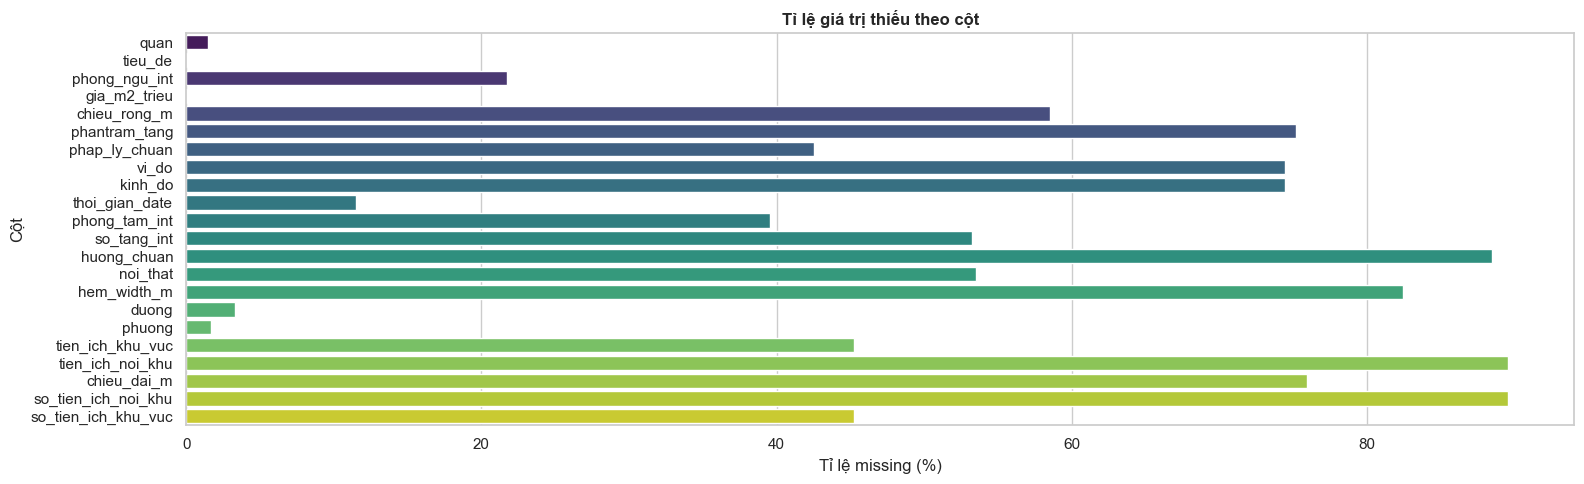

In [17]:
full_data_cot = plot_missing_ratio(df)

In [18]:
full_data_cot

0             link
1        thanh_pho
3             kieu
5          dia_chi
6      gia_tong_ty
7     dien_tich_m2
12       tong_quan
27          source
Name: cot, dtype: object

In [19]:
df['kieu'].unique()

array(['đất', 'nhà riêng', 'chung cư - căn hộ', 'nhà mặt tiền',
       'nhà biệt thự, liền kề', 'mặt bằng kinh doanh', 'đất nền dự án',
       'khác', 'nhà ngõ hẻm', 'đất thổ cư', 'đất nông nghiệp',
       'penthouse', 'duplex'], dtype=object)

Do trong dataset có rất nhiều kiểu bất động sản (13 loại), nên nhóm chia dataset thành các loại chính:
| Nhóm              | Các loại BĐS                                           |
| ----------------- | ------------------------------------------------------ |
| **1. Nhà ở**      | nhà riêng, nhà ngõ hẻm, nhà mặt tiền, biệt thự/liền kề |
| **2. Căn hộ**     | chung cư, penthouse, duplex                            |
| **3. Đất**        | đất, đất nền dự án, đất thổ cư, đất nông nghiệp        |
| **4. Kinh doanh** | mặt bằng kinh doanh, khác                              |

In [20]:
def phan_nhom_bds(loai_bds: str) -> str:
    loai_bds = loai_bds.lower().strip()
    # Nhóm Nhà ở
    nha_o = [
        "nhà ngõ hẻm",
        "nhà riêng",
        "nhà mặt tiền",
        "nhà biệt thự",
        "biệt thự",
        "liền kề"
    ]
    # Nhóm Căn hộ / Chung cư
    can_ho = [
        "chung cư",
        "căn hộ",
        "penthouse",
        "duplex"
    ]
    # Nhóm Đất
    dat = [
        "đất",
        "đất nền dự án",
        "đất thổ cư",
        "đất nông nghiệp"
    ]
    # Nhóm Kinh doanh – khai thác thương mại
    kinh_doanh = [
        "mặt bằng kinh doanh",
        "khác"
    ]
    for n in nha_o:
        if n in loai_bds:
            return "nhà ở"
    for c in can_ho:
        if c in loai_bds:
            return "căn hộ"
    for d in dat:
        if d in loai_bds:
            return "đất"
    for k in kinh_doanh:
        if k in loai_bds:
            return "kinh doanh"
    return "khác"


In [21]:
df['nhom_bds'] = df['kieu'].apply(lambda x: phan_nhom_bds(x) if pd.notna(x) else 'khác')
df['nhom_bds'].value_counts()

nhom_bds
căn hộ        7609
nhà ở         6861
đất           1783
kinh doanh    1514
Name: count, dtype: int64

In [22]:
numerical_features

['gia_tong_ty',
 'dien_tich_m2',
 'gia_m2_trieu',
 'chieu_rong_m',
 'phantram_tang',
 'phong_ngu_int',
 'phong_tam_int',
 'so_tang_int',
 'hem_width_m',
 'chieu_dai_m',
 'so_tien_ich_khu_vuc',
 'so_tien_ich_noi_khu']

In [28]:
df['kieu'].value_counts()

kieu
chung cư - căn hộ        7607
nhà ngõ hẻm              3041
nhà mặt tiền             1747
nhà riêng                1560
đất                      1554
khác                     1467
nhà biệt thự, liền kề     513
đất nền dự án             149
đất thổ cư                 77
mặt bằng kinh doanh        47
đất nông nghiệp             3
penthouse                   1
duplex                      1
Name: count, dtype: int64

In [33]:
non_features_in_dat = ['phong_ngu_int','phong_tam_int','so_tang_int','noi_that']
mask = df['nhom_bds'].isin(['đất', 'kinh doanh']) & df[non_features_in_dat].notna().any(axis=1)
dt = df.copy()
dt=df[~mask]
df=dt

In [34]:
df['nhom_bds'].value_counts()

nhom_bds
căn hộ        7609
nhà ở         6861
đất           1696
kinh doanh      61
Name: count, dtype: int64

Do bất động sản dạng kinh doanh có khá ít mẫu nên chỉ tiến hành phân tích và dự đoán ở căn hộ, nhà ở và đất

In [35]:
df_dat = df.loc[df['nhom_bds'] == 'đất',:].copy()
df_nha = df.loc[df['nhom_bds'] == 'nhà ở',:].copy()
df_kinhdoanh = df.loc[df['nhom_bds'] == 'kinh doanh',:].copy()
df_canho = df.loc[df['nhom_bds'] == 'căn hộ',:].copy()

In [36]:
categorical_features

['thanh_pho',
 'quan',
 'phuong',
 'duong',
 'kieu',
 'phap_ly_chuan',
 'huong_chuan',
 'noi_that']

In [37]:
numerical_features

['gia_tong_ty',
 'dien_tich_m2',
 'gia_m2_trieu',
 'chieu_rong_m',
 'phantram_tang',
 'phong_ngu_int',
 'phong_tam_int',
 'so_tang_int',
 'hem_width_m',
 'chieu_dai_m',
 'so_tien_ich_khu_vuc',
 'so_tien_ich_noi_khu']

### Xử lý missing values

In [38]:
df.columns

Index(['link', 'thanh_pho', 'quan', 'kieu', 'tieu_de', 'dia_chi',
       'gia_tong_ty', 'dien_tich_m2', 'phong_ngu_int', 'gia_m2_trieu',
       'chieu_rong_m', 'phantram_tang', 'tong_quan', 'phap_ly_chuan', 'vi_do',
       'kinh_do', 'thoi_gian_date', 'phong_tam_int', 'so_tang_int',
       'huong_chuan', 'noi_that', 'hem_width_m', 'duong', 'phuong',
       'tien_ich_khu_vuc', 'tien_ich_noi_khu', 'chieu_dai_m', 'source',
       'so_tien_ich_noi_khu', 'so_tien_ich_khu_vuc', 'nhom_bds'],
      dtype='object')

In [39]:
not_used_col = ['link','tieu_de','dia_chi','tien_ich_khu_vuc','tien_ich_noi_khu','source','vi_do','kinh_do']

In [40]:
df_dat.drop(columns=non_features_in_dat,inplace=True)
df_dat.drop(columns=not_used_col,inplace=True)
df_dat.drop(columns={'nhom_bds'},inplace=True)
df_nha.drop(columns=not_used_col,inplace=True)
df_canho.drop(columns=not_used_col,inplace=True)
df_nha.drop(columns={'nhom_bds'},inplace=True)
df_canho.drop(columns={'nhom_bds'},inplace=True)

In [41]:
df_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1696 entries, 0 to 17780
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            1696 non-null   object 
 1   quan                 1640 non-null   object 
 2   kieu                 1696 non-null   object 
 3   gia_tong_ty          1696 non-null   float64
 4   dien_tich_m2         1696 non-null   float64
 5   gia_m2_trieu         1693 non-null   float64
 6   chieu_rong_m         1373 non-null   float64
 7   phantram_tang        1313 non-null   float64
 8   tong_quan            1696 non-null   object 
 9   phap_ly_chuan        1683 non-null   object 
 10  thoi_gian_date       1010 non-null   object 
 11  huong_chuan          601 non-null    object 
 12  hem_width_m          1061 non-null   float64
 13  duong                1694 non-null   object 
 14  phuong               1645 non-null   object 
 15  chieu_dai_m          274 non-null    float

In [42]:
df_dat.drop(columns='so_tien_ich_noi_khu',inplace=True)

In [43]:
df_dat.columns

Index(['thanh_pho', 'quan', 'kieu', 'gia_tong_ty', 'dien_tich_m2',
       'gia_m2_trieu', 'chieu_rong_m', 'phantram_tang', 'tong_quan',
       'phap_ly_chuan', 'thoi_gian_date', 'huong_chuan', 'hem_width_m',
       'duong', 'phuong', 'chieu_dai_m', 'so_tien_ich_khu_vuc'],
      dtype='object')

- `quan` với `phuong` missing có sự phụ thuộc: `phuong` sẽ missing nếu `quan` cũng missing
- `gia_m2_trieu` có thể được suy ra từ `gia_tong_ty`/`dien_tich_m2`
- `chieu_dai_m2` có thể được suy ra từ `dien_tich_m2`/`chieu_rong_m`, `chieu_rong_m` missing là do quá trình nhập liệu của người đăng tin
- `phantram_tang` mỗi năm null do nhập liệu
- `phap_ly_chuan` null do nhập liệu
- `thoi_gian_date` null do crawler không dò được ngày
- `huong_chuan` missing khá nhiều (hơn 1 nửa), do nhập liệu ko cung cấp đủ thông tin
- tương tự các thuộc tính khác cũng do nhập liệu, trích xuất không đủ
- `phong_ngu_int`,  `phong_tam_int`,  `so_tang_int`,  `noi_that`,  `so_tien_ich_noi_khu` là các giá trị mà căn hộ và nhà ở có nhưng đất thì không có -> viết hàm riêng

In [44]:
df_nha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6861 entries, 1 to 17554
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            6861 non-null   object 
 1   quan                 6741 non-null   object 
 2   kieu                 6861 non-null   object 
 3   gia_tong_ty          6861 non-null   float64
 4   dien_tich_m2         6861 non-null   float64
 5   phong_ngu_int        5827 non-null   float64
 6   gia_m2_trieu         6861 non-null   float64
 7   chieu_rong_m         5453 non-null   float64
 8   phantram_tang        2396 non-null   float64
 9   tong_quan            6861 non-null   object 
 10  phap_ly_chuan        6717 non-null   object 
 11  thoi_gian_date       5828 non-null   object 
 12  phong_tam_int        4957 non-null   float64
 13  so_tang_int          5893 non-null   float64
 14  huong_chuan          1078 non-null   object 
 15  noi_that             2508 non-null   objec

- những cột ko cần xử lý của nhà: số tiện ích nội khu
- những cột ko cần xử lý của căn hộ: chiều dài, hẻm, hướng, pháp lý, chiều rộng, phần trăm tăng

In [45]:
df_canho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7609 entries, 2 to 17512
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            7609 non-null   object 
 1   quan                 7609 non-null   object 
 2   kieu                 7609 non-null   object 
 3   gia_tong_ty          7609 non-null   float64
 4   dien_tich_m2         7609 non-null   float64
 5   phong_ngu_int        6793 non-null   float64
 6   gia_m2_trieu         7609 non-null   float64
 7   chieu_rong_m         53 non-null     float64
 8   phantram_tang        650 non-null    float64
 9   tong_quan            7609 non-null   object 
 10  phap_ly_chuan        810 non-null    object 
 11  thoi_gian_date       7327 non-null   object 
 12  phong_tam_int        4798 non-null   float64
 13  so_tang_int          1793 non-null   float64
 14  huong_chuan          319 non-null    object 
 15  noi_that             4686 non-null   objec

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\3213671863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')


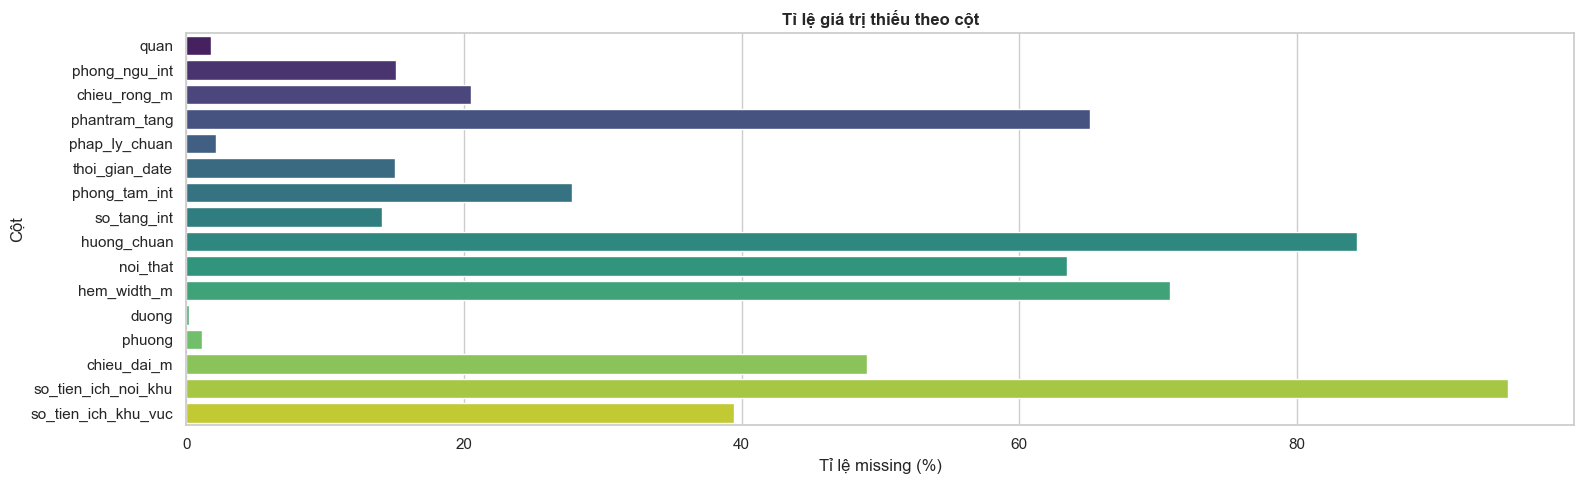

0       thanh_pho
2            kieu
3     gia_tong_ty
4    dien_tich_m2
6    gia_m2_trieu
9       tong_quan
Name: cot, dtype: object

In [46]:
plot_missing_ratio(df_nha)

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\3213671863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')


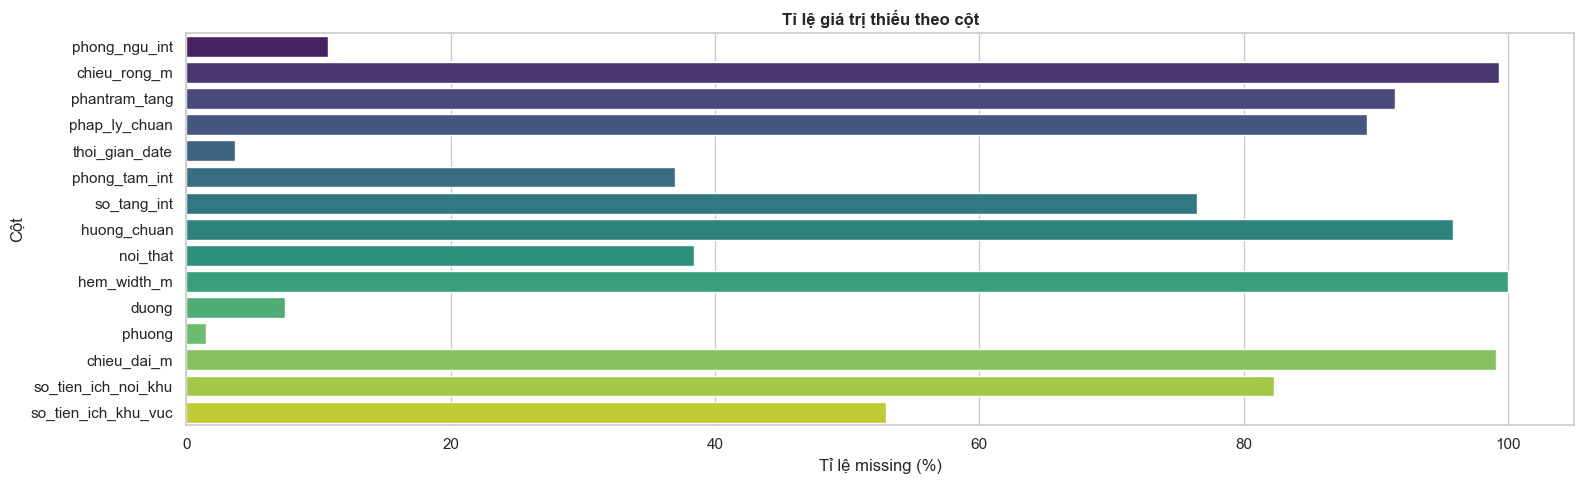

0       thanh_pho
1            quan
2            kieu
3     gia_tong_ty
4    dien_tich_m2
6    gia_m2_trieu
9       tong_quan
Name: cot, dtype: object

In [47]:
plot_missing_ratio(df_canho)

In [48]:
def capped_median(series):
    """Tính median sau khi loại bỏ ngoại lai bằng phương pháp IQR."""
    series = series.dropna()  # Bỏ giá trị NaN nếu có
    if series.empty:
        return np.nan
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    filtered = series[(series >= lower) & (series <= upper)]
    return filtered.median() if not filtered.empty else series.median()

In [49]:
def fillna_by_group_capped_median(df: pd.DataFrame, group_col: str, target_col: str) -> pd.Series:
    """
    Điền giá trị thiếu cho `target_col` bằng capped median theo nhóm `group_col`.
    """
    # Tính median theo nhóm sau khi cap
    median_map = df.groupby(group_col)[target_col].agg(capped_median)
    # Áp dụng map để điền
    return df.apply(
        lambda row: median_map[row[group_col]] if pd.isna(row[target_col]) else row[target_col],
        axis=1
    )

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\3213671863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')


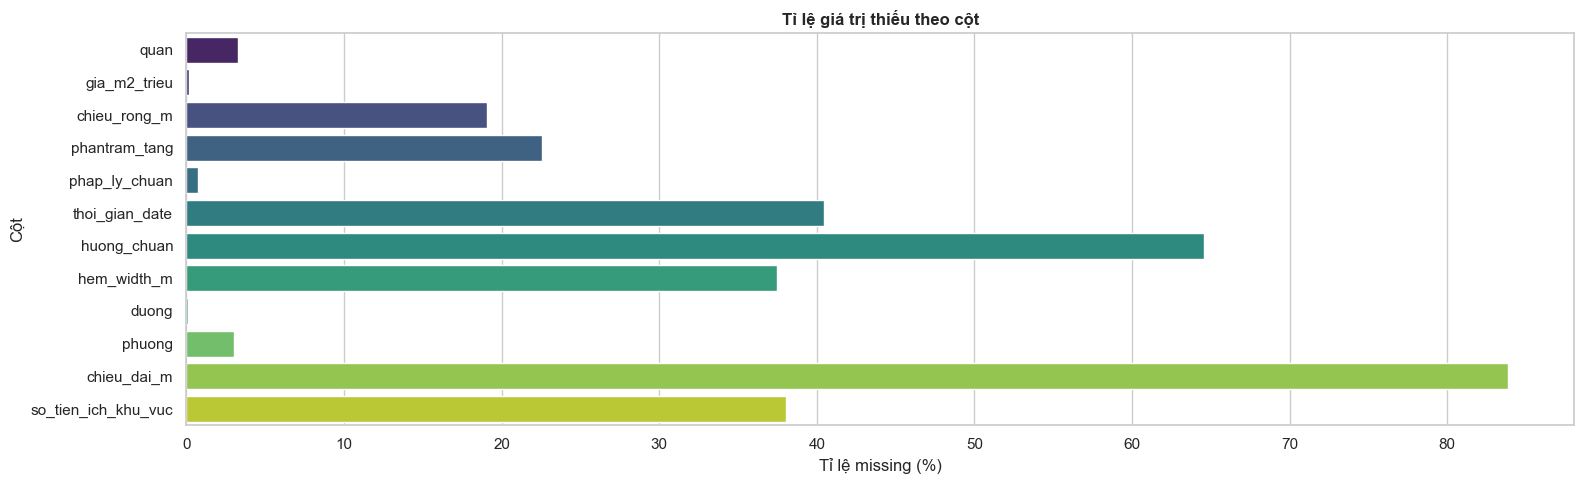

0       thanh_pho
2            kieu
3     gia_tong_ty
4    dien_tich_m2
8       tong_quan
Name: cot, dtype: object

In [50]:
plot_missing_ratio(df_dat)

In [51]:
def fill_missing_val_dat(df: pd.DataFrame, df_goc: pd.DataFrame):
    # Xử lý quận, chiều rộng:
    df.dropna(axis=0,subset=['quan','chieu_rong_m'],how='any',inplace=True)
    # Xử lý giá/m2:
    df['gia_m2_trieu'] = df.apply(lambda x: x['gia_tong_ty']*1000/x['dien_tich_m2'] if pd.notna(x['gia_tong_ty']) and pd.notna(x['dien_tich_m2']) and pd.isna(x['gia_m2_trieu']) else x['gia_m2_trieu'],axis=1)
    # Xử lý chiều dài:
    df.chieu_dai_m = df.apply(lambda x: x['dien_tich_m2']/x['chieu_rong_m'] if pd.notna(x['dien_tich_m2']) and pd.notna(x['chieu_rong_m']) and pd.isna(x['chieu_dai_m']) else x['chieu_dai_m'], axis=1)
    # Xử lý pháp lý:
    df['phap_ly_chuan'] = df['phap_ly_chuan'].fillna('không rõ')
    #Xử lý thời gian:
    if not df['thoi_gian_date'].mode().empty:
        df['thoi_gian_date'] = df['thoi_gian_date'].fillna(df['thoi_gian_date'].mode().iloc[0])
    # Xử lý hướng
    df['huong_chuan'] = df['huong_chuan'].fillna('không rõ')
    # Xử lý phường:
    mode_map_phuong = df.groupby('quan')['phuong'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['phuong'] = df['phuong'].fillna(df['quan'].map(mode_map_phuong))
    # Xử lý đường:
    mode_map_duong = df.groupby('quan')['duong'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['duong'] = df['duong'].fillna(df['quan'].map(mode_map_duong))
    #Xử lý hẻm:
    sr_hem = df_goc.groupby('nhom_bds')['hem_width_m'].agg('median')['đất']
    df['hem_width_m'] = df['hem_width_m'].fillna(sr_hem)
    #Số tiện ích khu vực:
    sr_kv = df_goc.groupby('quan')['so_tien_ich_khu_vuc'].agg('median')
    df['so_tien_ich_khu_vuc'] = df['so_tien_ich_khu_vuc'].fillna(df['quan'].map(sr_kv))
    # phần trăm tăng:
    sr_pt = df_goc.groupby('quan')['phantram_tang'].agg('median')
    df['phantram_tang'] = df['phantram_tang'].fillna(df['quan'].map(sr_pt))
    return df

In [52]:
df_dat = fill_missing_val_dat(df_dat,df)

In [53]:
df_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 0 to 17767
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            1323 non-null   object 
 1   quan                 1323 non-null   object 
 2   kieu                 1323 non-null   object 
 3   gia_tong_ty          1323 non-null   float64
 4   dien_tich_m2         1323 non-null   float64
 5   gia_m2_trieu         1323 non-null   float64
 6   chieu_rong_m         1323 non-null   float64
 7   phantram_tang        1323 non-null   float64
 8   tong_quan            1323 non-null   object 
 9   phap_ly_chuan        1323 non-null   object 
 10  thoi_gian_date       1323 non-null   object 
 11  huong_chuan          1323 non-null   object 
 12  hem_width_m          1323 non-null   float64
 13  duong                1323 non-null   object 
 14  phuong               1323 non-null   object 
 15  chieu_dai_m          1323 non-null   float

In [54]:
df_dat.dropna(axis=0,subset=['so_tien_ich_khu_vuc'],inplace=True)

In [55]:
df_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 0 to 17767
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            1322 non-null   object 
 1   quan                 1322 non-null   object 
 2   kieu                 1322 non-null   object 
 3   gia_tong_ty          1322 non-null   float64
 4   dien_tich_m2         1322 non-null   float64
 5   gia_m2_trieu         1322 non-null   float64
 6   chieu_rong_m         1322 non-null   float64
 7   phantram_tang        1322 non-null   float64
 8   tong_quan            1322 non-null   object 
 9   phap_ly_chuan        1322 non-null   object 
 10  thoi_gian_date       1322 non-null   object 
 11  huong_chuan          1322 non-null   object 
 12  hem_width_m          1322 non-null   float64
 13  duong                1322 non-null   object 
 14  phuong               1322 non-null   object 
 15  chieu_dai_m          1322 non-null   float

`phong_ngu_int`,  `phong_tam_int`,  `so_tang_int`,  `noi_that`,  `so_tien_ich_noi_khu` là các giá trị mà căn hộ và nhà ở có nhưng đất thì không có -> viết hàm riêng

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\3213671863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')


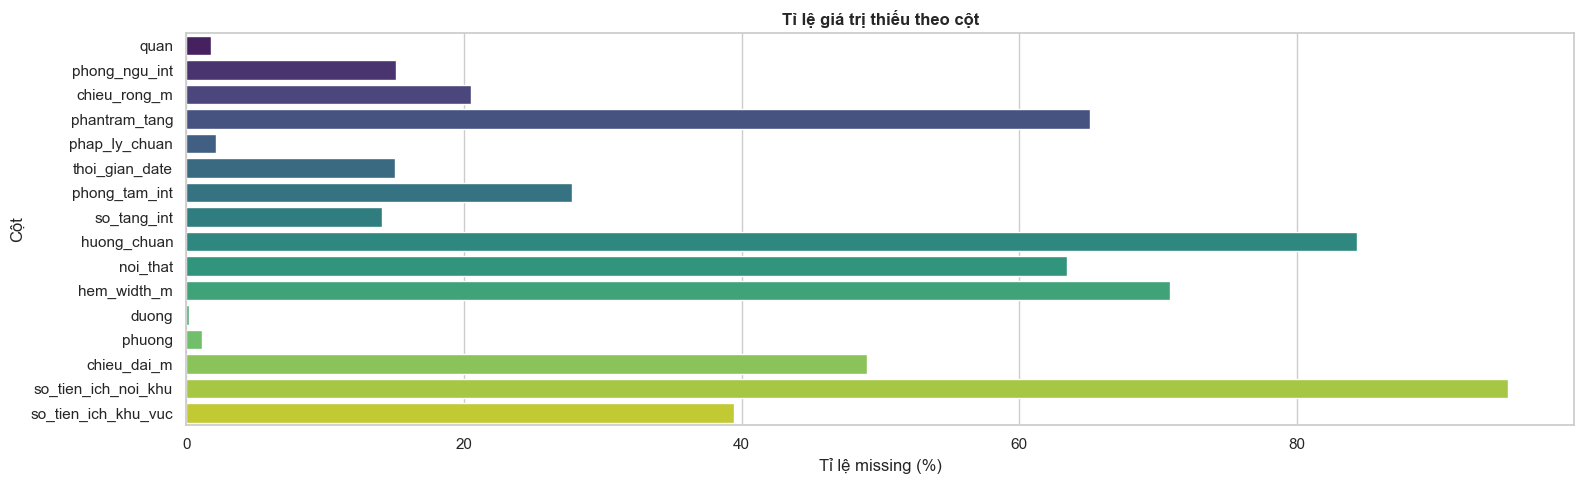

0       thanh_pho
2            kieu
3     gia_tong_ty
4    dien_tich_m2
6    gia_m2_trieu
9       tong_quan
Name: cot, dtype: object

In [56]:
plot_missing_ratio(df_nha)

In [57]:
df.kieu.unique()

array(['đất', 'nhà riêng', 'chung cư - căn hộ', 'nhà mặt tiền',
       'nhà biệt thự, liền kề', 'đất nền dự án', 'khác',
       'mặt bằng kinh doanh', 'nhà ngõ hẻm', 'đất thổ cư', 'penthouse',
       'đất nông nghiệp', 'duplex'], dtype=object)

In [58]:
def fill_missing_val_nha(df: pd.DataFrame, df_goc:pd.DataFrame):
    # `phong_ngu_int`,  `phong_tam_int`,  `so_tang_int`,  `noi_that`,  `so_tien_ich_noi_khu`
    sr_pn = df_goc.groupby('kieu')['phong_ngu_int'].agg('median')
    df['phong_ngu_int'] = df['phong_ngu_int'].fillna(df['kieu'].map(sr_pn))

    sr_pt = df_goc.groupby('kieu')['phong_tam_int'].agg('median')
    df['phong_tam_int'] = df['phong_tam_int'].fillna(df['kieu'].map(sr_pt))

    sr_st = df_goc.groupby('kieu')['so_tang_int'].agg('median')
    df['so_tang_int'] = df['so_tang_int'].fillna(df['kieu'].map(sr_st))

    sr_nk = df_goc.groupby('quan')['so_tien_ich_noi_khu'].agg('median')
    df['so_tien_ich_noi_khu'] = df['so_tien_ich_noi_khu'].fillna(df['quan'].map(sr_nk))
    
    df['noi_that'] = df['noi_that'].fillna('không rõ')

    return df

In [59]:
df_n = df_nha.copy()

In [60]:

df_n = fill_missing_val_dat(df_n,df)

In [61]:
df_n = fill_missing_val_nha(df_n,df)

In [62]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5361 entries, 1 to 17554
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            5361 non-null   object 
 1   quan                 5361 non-null   object 
 2   kieu                 5361 non-null   object 
 3   gia_tong_ty          5361 non-null   float64
 4   dien_tich_m2         5361 non-null   float64
 5   phong_ngu_int        5361 non-null   float64
 6   gia_m2_trieu         5361 non-null   float64
 7   chieu_rong_m         5361 non-null   float64
 8   phantram_tang        5361 non-null   float64
 9   tong_quan            5361 non-null   object 
 10  phap_ly_chuan        5361 non-null   object 
 11  thoi_gian_date       5361 non-null   object 
 12  phong_tam_int        5361 non-null   float64
 13  so_tang_int          5361 non-null   float64
 14  huong_chuan          5361 non-null   object 
 15  noi_that             5361 non-null   objec

In [63]:
df_n.dropna(axis=0,subset=['so_tien_ich_noi_khu'],inplace=True)

In [64]:
df_nha = df_n.copy()

In [65]:
df_nha.loc[df_nha['kieu'] == 'nhà mặt tiền', 'hem_width_m'] = 0

In [66]:
df_nha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5327 entries, 1 to 17554
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            5327 non-null   object 
 1   quan                 5327 non-null   object 
 2   kieu                 5327 non-null   object 
 3   gia_tong_ty          5327 non-null   float64
 4   dien_tich_m2         5327 non-null   float64
 5   phong_ngu_int        5327 non-null   float64
 6   gia_m2_trieu         5327 non-null   float64
 7   chieu_rong_m         5327 non-null   float64
 8   phantram_tang        5327 non-null   float64
 9   tong_quan            5327 non-null   object 
 10  phap_ly_chuan        5327 non-null   object 
 11  thoi_gian_date       5327 non-null   object 
 12  phong_tam_int        5327 non-null   float64
 13  so_tang_int          5327 non-null   float64
 14  huong_chuan          5327 non-null   object 
 15  noi_that             5327 non-null   objec

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\3213671863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=missing_df, x='missing_ratio', y='cot', palette='viridis')


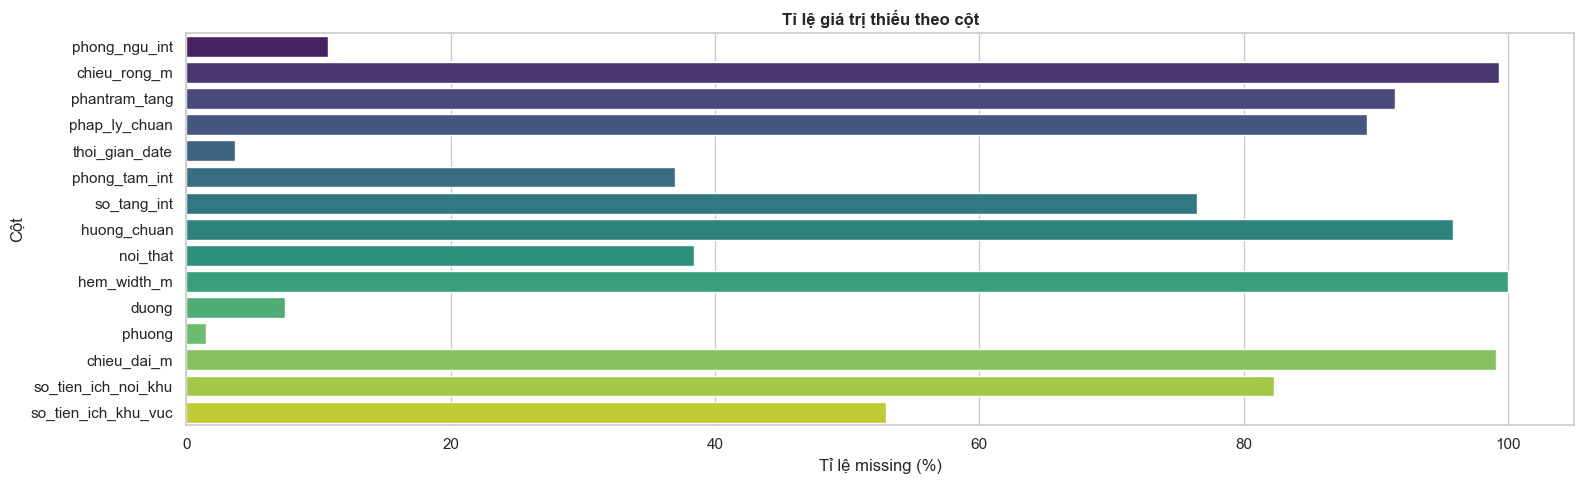

0       thanh_pho
1            quan
2            kieu
3     gia_tong_ty
4    dien_tich_m2
6    gia_m2_trieu
9       tong_quan
Name: cot, dtype: object

In [67]:
plot_missing_ratio(df_canho)

In [68]:
def fill_missing_val_canho(df: pd.DataFrame, df_goc):
    df.drop(columns=['phantram_tang','phap_ly_chuan','so_tang_int', 'huong_chuan','hem_width_m','chieu_dai_m','so_tien_ich_noi_khu','chieu_rong_m'],inplace=True)

    # Xử lý quận
    df.dropna(axis=0,subset=['quan'],inplace=True)
    # Xử lý giá/m2:
    df['gia_m2_trieu'] = df.apply(lambda x: x['gia_tong_ty']*1000/x['dien_tich_m2'] if pd.notna(x['gia_tong_ty']) and pd.notna(x['dien_tich_m2']) and pd.isna(x['gia_m2_trieu']) else x['gia_m2_trieu'],axis=1)
    # thời gian
    if not df['thoi_gian_date'].mode().empty:
        df['thoi_gian_date'] = df['thoi_gian_date'].fillna(df['thoi_gian_date'].mode().iloc[0])
    # Xử lý phường:
    mode_map_phuong = df.groupby('quan')['phuong'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['phuong'] = df['phuong'].fillna(df['quan'].map(mode_map_phuong))
    # Xử lý đường:
    mode_map_duong = df.groupby('quan')['duong'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['duong'] = df['duong'].fillna(df['quan'].map(mode_map_duong))
    #Số tiện ích khu vực:
    sr_kv = df_goc.groupby('quan')['so_tien_ich_khu_vuc'].agg('median')
    df['so_tien_ich_khu_vuc'] = df['so_tien_ich_khu_vuc'].fillna(df['quan'].map(sr_kv))

    sr_pn = df_goc.groupby('kieu')['phong_ngu_int'].agg('median')
    df['phong_ngu_int'] = df['phong_ngu_int'].fillna(df['kieu'].map(sr_pn))
    sr_pt = df_goc.groupby('kieu')['phong_tam_int'].agg('median')
    df['phong_tam_int'] = df['phong_tam_int'].fillna(df['kieu'].map(sr_pt))

    df['noi_that'] = df['noi_that'].fillna('không rõ')

    return df


In [69]:
df_c = df_canho.copy()

In [70]:
df_c = fill_missing_val_canho(df_c,df)

In [71]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7609 entries, 2 to 17512
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            7609 non-null   object 
 1   quan                 7609 non-null   object 
 2   kieu                 7609 non-null   object 
 3   gia_tong_ty          7609 non-null   float64
 4   dien_tich_m2         7609 non-null   float64
 5   phong_ngu_int        7609 non-null   float64
 6   gia_m2_trieu         7609 non-null   float64
 7   tong_quan            7609 non-null   object 
 8   thoi_gian_date       7609 non-null   object 
 9   phong_tam_int        7608 non-null   float64
 10  noi_that             7609 non-null   object 
 11  duong                7609 non-null   object 
 12  phuong               7609 non-null   object 
 13  so_tien_ich_khu_vuc  7609 non-null   float64
dtypes: float64(6), object(8)
memory usage: 891.7+ KB


In [72]:
df_c.dropna(axis=0,subset=['phong_tam_int'],inplace=True)

In [73]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7608 entries, 2 to 17512
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   thanh_pho            7608 non-null   object 
 1   quan                 7608 non-null   object 
 2   kieu                 7608 non-null   object 
 3   gia_tong_ty          7608 non-null   float64
 4   dien_tich_m2         7608 non-null   float64
 5   phong_ngu_int        7608 non-null   float64
 6   gia_m2_trieu         7608 non-null   float64
 7   tong_quan            7608 non-null   object 
 8   thoi_gian_date       7608 non-null   object 
 9   phong_tam_int        7608 non-null   float64
 10  noi_that             7608 non-null   object 
 11  duong                7608 non-null   object 
 12  phuong               7608 non-null   object 
 13  so_tien_ich_khu_vuc  7608 non-null   float64
dtypes: float64(6), object(8)
memory usage: 891.6+ KB


In [74]:
df_canho = df_c.copy()

In [75]:
numeric_col_nha = df_nha.select_dtypes(include='number').columns.tolist()
numeric_col_dat = df_dat.select_dtypes(include='number').columns.tolist()
numeric_col_canho = df_canho.select_dtypes(include='number').columns.tolist()
print(numeric_col_dat,numeric_col_nha,numeric_col_canho, sep='\n')

['gia_tong_ty', 'dien_tich_m2', 'gia_m2_trieu', 'chieu_rong_m', 'phantram_tang', 'hem_width_m', 'chieu_dai_m', 'so_tien_ich_khu_vuc']
['gia_tong_ty', 'dien_tich_m2', 'phong_ngu_int', 'gia_m2_trieu', 'chieu_rong_m', 'phantram_tang', 'phong_tam_int', 'so_tang_int', 'hem_width_m', 'chieu_dai_m', 'so_tien_ich_noi_khu', 'so_tien_ich_khu_vuc']
['gia_tong_ty', 'dien_tich_m2', 'phong_ngu_int', 'gia_m2_trieu', 'phong_tam_int', 'so_tien_ich_khu_vuc']


In [76]:
# Kiểm tra với các thuộc tính numerical:
def boxplot_ngoailai(data: pd.DataFrame,num_features: list[str]):
    df = data.copy()
    num_plots = len(num_features)
    nrows, ncols = 4, 3
    num_plots = len(num_features)
    total_subplots = nrows * ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 9))
    axes = axes.flatten()

    for i, col in enumerate(num_features[:total_subplots]):
        sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel("")

    for j in range(num_plots, total_subplots):
        fig.delaxes(axes[j])

    fig.suptitle("Boxplot kiểm tra ngoại lai cho các biến số" , fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

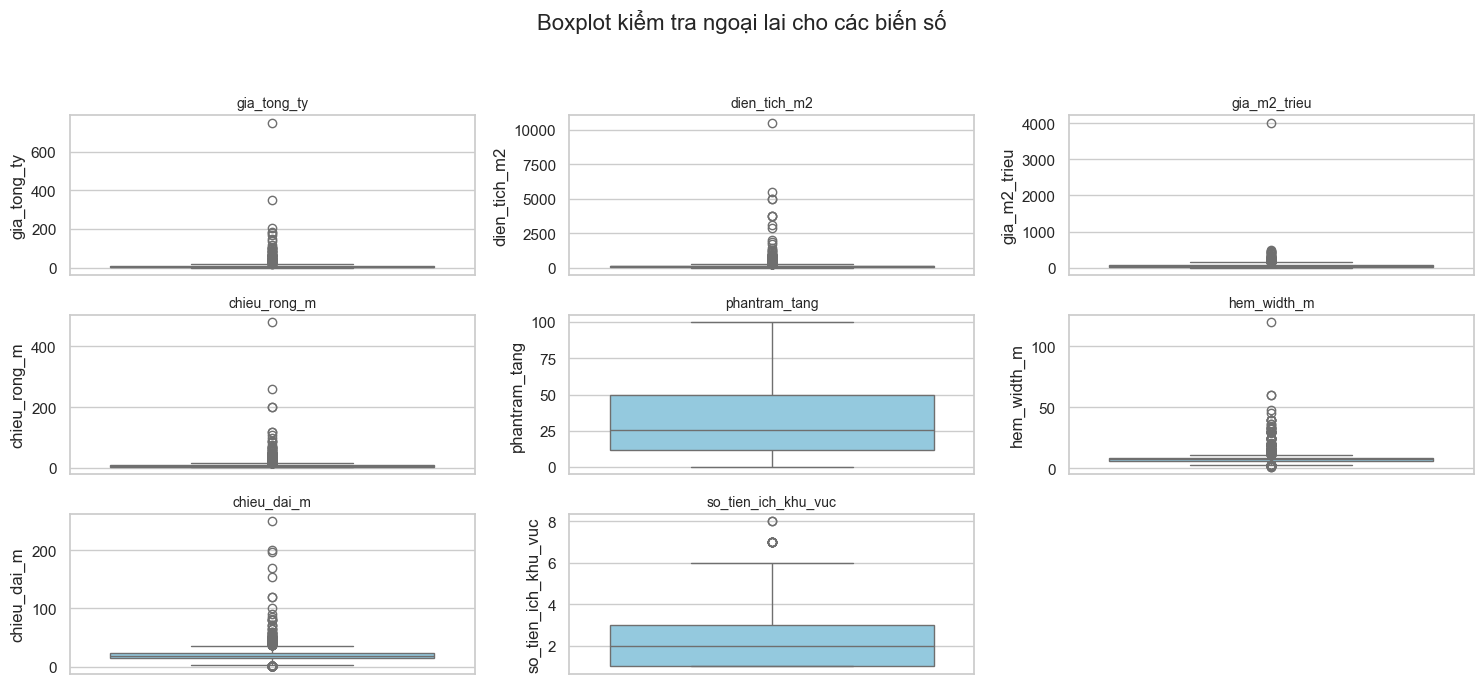

In [77]:
boxplot_ngoailai(data=df_dat,num_features=numeric_col_dat)

In [78]:
for col in numeric_col_dat:
    print(col+ ' : ', df_dat[col].skew())

gia_tong_ty :  16.22889249002869
dien_tich_m2 :  13.138556299567682
gia_m2_trieu :  24.557704865082712
chieu_rong_m :  13.630509603535057
phantram_tang :  0.7479692448575207
hem_width_m :  5.152429121571849
chieu_dai_m :  6.376185571795681
so_tien_ich_khu_vuc :  1.6517474258755787


In [79]:
skew_dat = [x for x in numeric_col_dat if x != 'phantram_tang']
for col in skew_dat:
    df_dat[f'log_{col}'] = np.log1p(df_dat[col])

In [80]:
log_dat_kd_features = [('log_' + col) for col in skew_dat]
for col in log_dat_kd_features:
    print(col + ": ", df_dat[col].skew())

log_gia_tong_ty:  1.014376723674549
log_dien_tich_m2:  -1.1000434885205113
log_gia_m2_trieu:  -0.4432464161136027
log_chieu_rong_m:  2.177670280094051
log_hem_width_m:  0.9150304764438434
log_chieu_dai_m:  -2.0904126477801603
log_so_tien_ich_khu_vuc:  0.5939819460165479


In [81]:
def hist_plt(data: pd.DataFrame,num_features: list[str]):
    df = data.copy()
    num_plots = len(num_features)
    nrows, ncols = 4, 3
    num_plots = len(num_features)
    total_subplots = nrows * ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 9))
    axes = axes.flatten()

    for i, col in enumerate(num_features[:total_subplots]):
        sns.histplot(data=df,x=col,ax=axes[i], color='lightcoral')
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel("")

    for j in range(num_plots, total_subplots):
        fig.delaxes(axes[j])

    fig.suptitle("Histogram" , fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [82]:
log_dat_kd_features.append('phantram_tang')

In [83]:
log_dat_kd_features

['log_gia_tong_ty',
 'log_dien_tich_m2',
 'log_gia_m2_trieu',
 'log_chieu_rong_m',
 'log_hem_width_m',
 'log_chieu_dai_m',
 'log_so_tien_ich_khu_vuc',
 'phantram_tang']

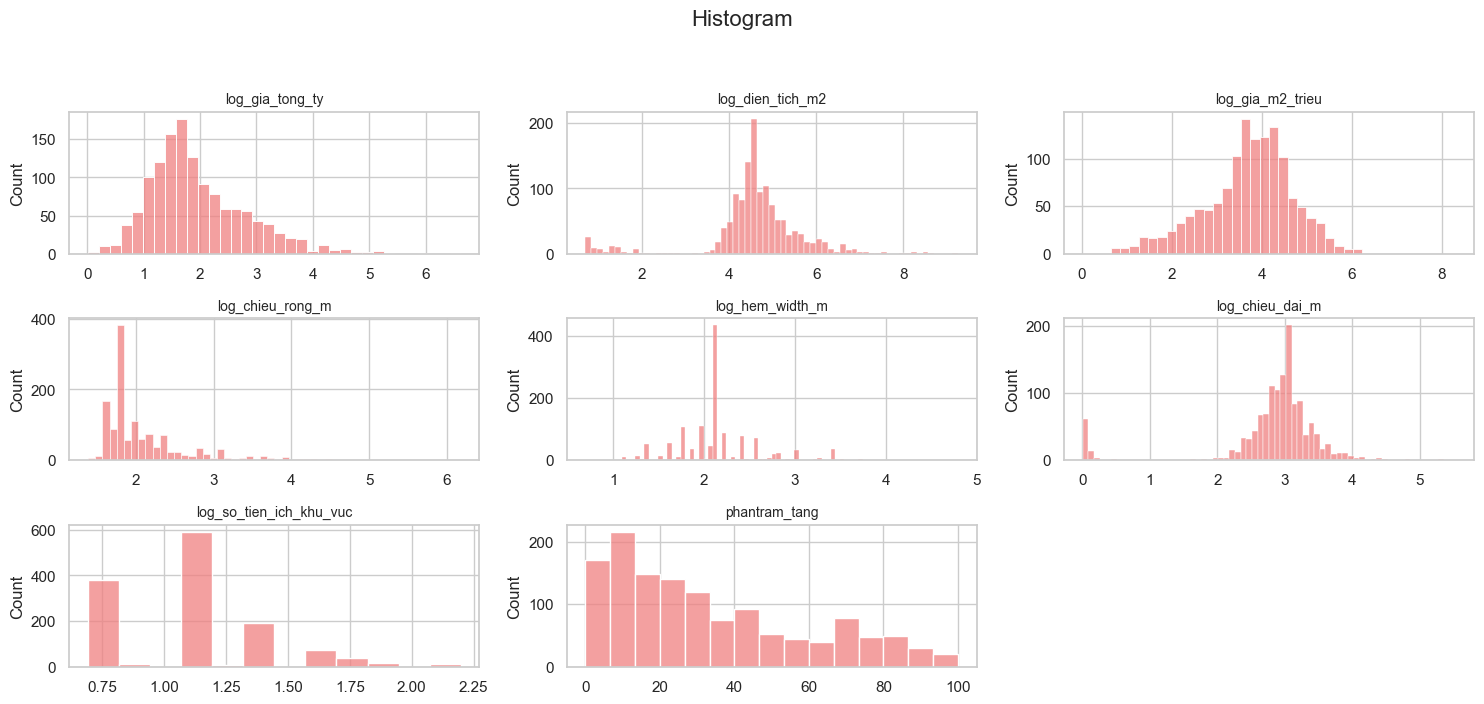

In [84]:
hist_plt(df_dat,num_features=log_dat_kd_features)

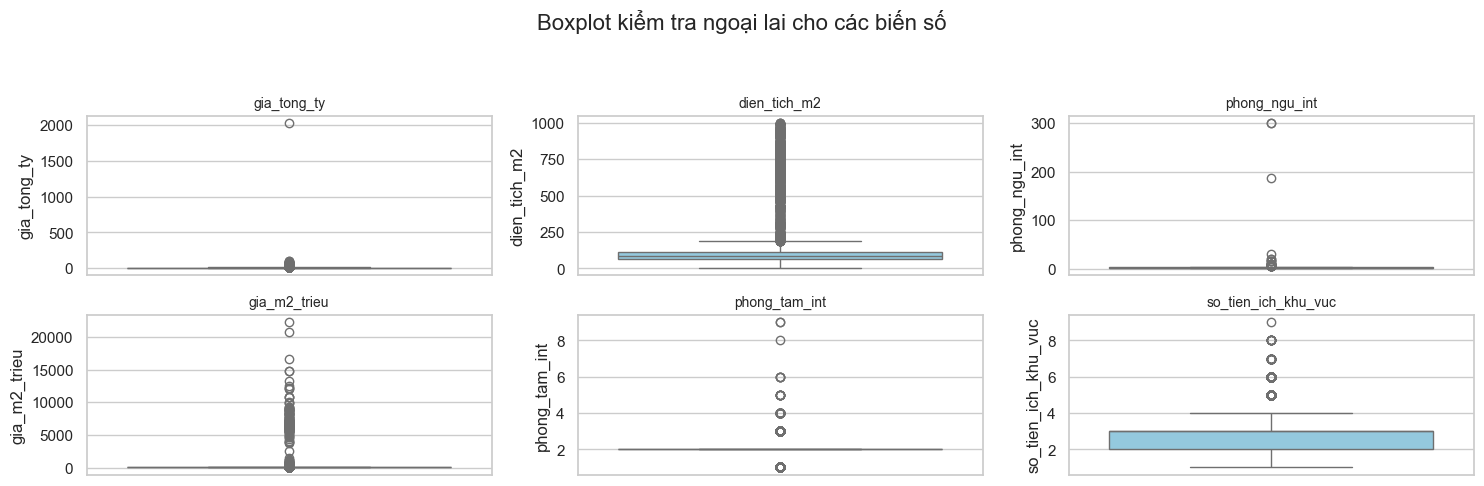

In [85]:
boxplot_ngoailai(df_canho,numeric_col_canho)

In [86]:
for col in numeric_col_canho:
    print(col+ ' : ', df_canho[col].skew())

gia_tong_ty :  79.24532353068564
dien_tich_m2 :  3.368166623161801
phong_ngu_int :  50.87643412042819
gia_m2_trieu :  10.120312883287715
phong_tam_int :  2.434997500300084
so_tien_ich_khu_vuc :  0.8689930741470326


In [87]:
skew_canho = [x for x in numeric_col_canho if x != 'so_tien_ich_khu_vuc']
for col in skew_canho:
    df_canho[f'log_{col}'] = np.log1p(df_canho[col])

In [88]:
log_canho_kd_features = [('log_' + col) for col in skew_canho]
for col in log_canho_kd_features:
    print(col + ": ", df_canho[col].skew())

log_gia_tong_ty:  -0.08279730844597316
log_dien_tich_m2:  -0.733485835135267
log_phong_ngu_int:  2.7423372477391315
log_gia_m2_trieu:  -0.05643515914491984
log_phong_tam_int:  -0.5853342553152557


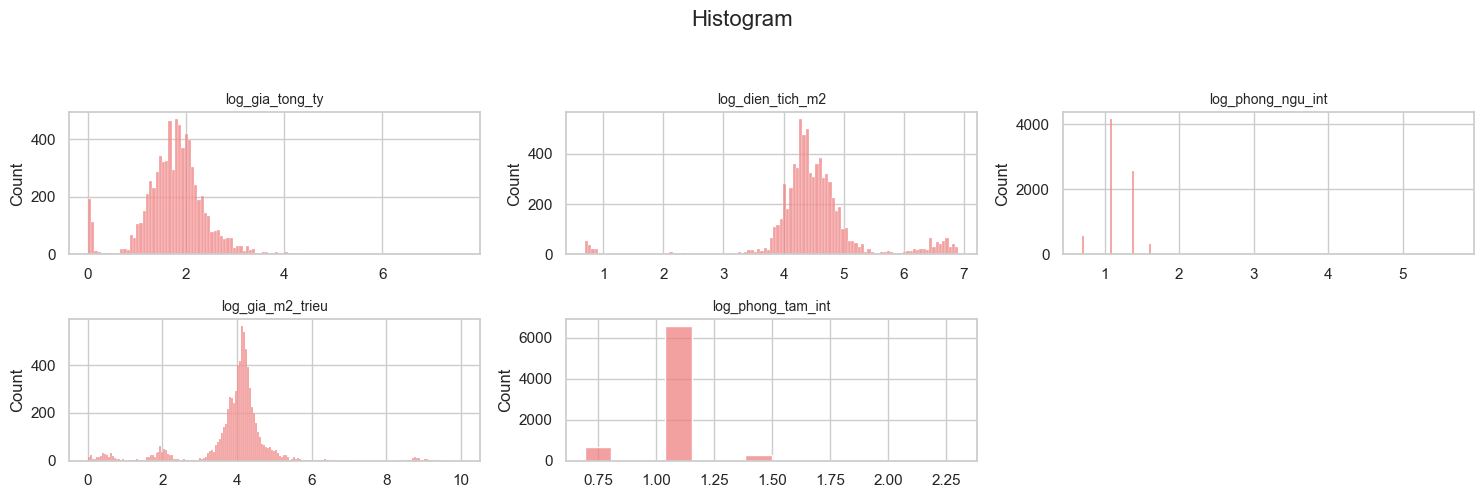

In [89]:
hist_plt(df_canho,log_canho_kd_features)

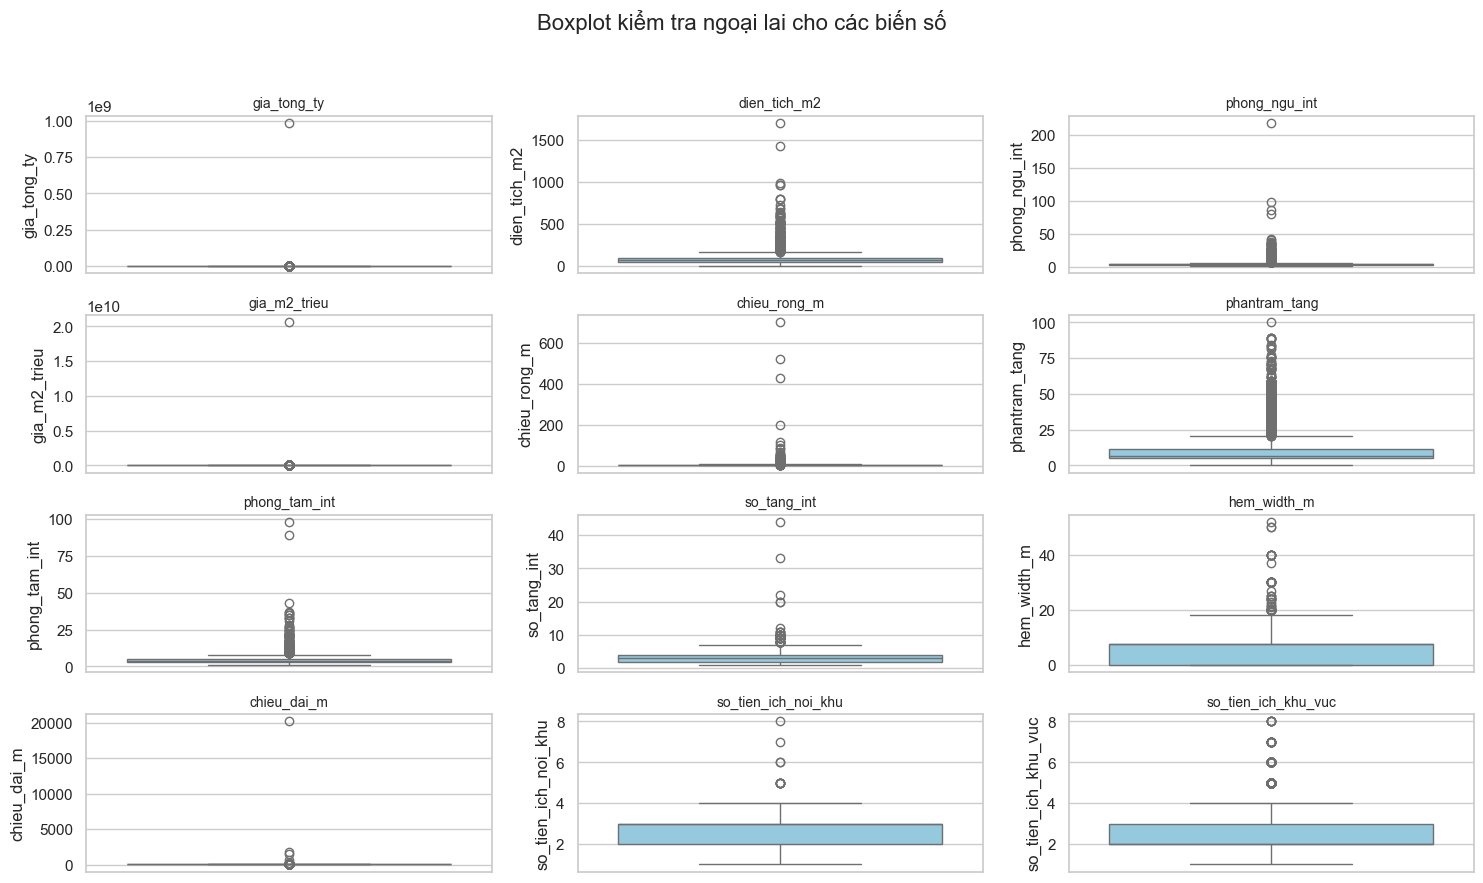

In [90]:
boxplot_ngoailai(df_nha,numeric_col_nha)

In [91]:
for col in numeric_col_nha:
    print(col+ ' : ', df_nha[col].skew())

gia_tong_ty :  72.98630008392237
dien_tich_m2 :  5.755260108544256
phong_ngu_int :  23.037346668455964
gia_m2_trieu :  72.98630006618642
chieu_rong_m :  37.362753591538535
phantram_tang :  2.4995890725001755
phong_tam_int :  11.447126738197976
so_tang_int :  5.083896608507865
hem_width_m :  1.9144134943698339
chieu_dai_m :  71.51537637267725
so_tien_ich_noi_khu :  -0.5533288943507916
so_tien_ich_khu_vuc :  1.321807512542982


In [92]:
def iqr(df:pd.DataFrame,col:str):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

In [93]:
ngoai_lai_nha = iqr(df_nha,'gia_tong_ty')
ngoai_lai_nha

,thanh_pho,quan,kieu,gia_tong_ty,dien_tich_m2,phong_ngu_int,gia_m2_trieu,chieu_rong_m,phantram_tang,tong_quan,...,phong_tam_int,so_tang_int,huong_chuan,noi_that,hem_width_m,duong,phuong,chieu_dai_m,so_tien_ich_noi_khu,so_tien_ich_khu_vuc
1,hồ chí minh,phú nhuận,nhà riêng,31.0,90.20,14.0,343.68,7.80,0.60,cần bán gấp toà nhà căn hộ dịch vụ cho người n...,...,16.0,7.0,không rõ,không rõ,7.5,đường nguyễn đình chính,phường 11,11.564103,3.0,1.0
10,hồ chí minh,quận 1,nhà riêng,35.0,100.00,4.0,350.00,5.00,2.50,- vị trí mặt tiền hẻm trước sau đường nguyễn b...,...,4.0,3.0,không rõ,không rõ,10.0,đường nguyễn bỉnh khiêm,phường bến nghé,20.000000,1.0,2.0
18,hồ chí minh,tân bình,nhà riêng,27.0,73.00,2.0,369.86,4.80,9.90,chính chủ cần bán tòa nhà thiết kế công năng l...,...,7.0,8.0,tây nam,không rõ,8.0,đường nguyễn văn trỗi,phường 1,15.208333,2.0,6.0
42,hồ chí minh,gò vấp,"nhà biệt thự, liền kề",44.0,180.00,5.0,244.44,9.00,22.30,"biệt thự cao cấp - gò vấp.\n- đường số 8, p. 5...",...,6.0,2.0,không rõ,không rõ,10.0,đường số 8,phường 5,20.000000,2.0,1.0
81,hồ chí minh,thủ đức,nhà mặt tiền,92.0,1.38,5.0,66.67,25.00,5.30,"địa chỉ: 128, đường gò dưa, tam bình, thủ đức,...",...,5.0,3.0,không rõ,không rõ,0.0,đường gò dưa,phường tam bình,0.055200,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16799,hồ chí minh,bình thạnh,nhà mặt tiền,850.0,1425.00,10.0,596.49,21.65,8.30,toà nhà mặt tiền phan đăng lưu – bình thạnh\nv...,...,6.0,10.0,không rõ,nội thất cao cấp,0.0,đường phan đăng lưu,phường 3,55.000000,3.0,2.0
16820,hồ chí minh,gò vấp,nhà mặt tiền,37.9,176.00,6.0,215.34,8.00,2.90,"biệt thự thiết kế theo phong cách bán cổ điển,...",...,6.0,4.0,không rõ,nội thất cao cấp,0.0,đường lê đức thọ,phường 7,22.000000,2.0,2.0
17433,hồ chí minh,quận 10,nhà mặt tiền,35.0,160.00,10.0,218.75,8.00,3.35,"nợ ngân hàng, cần bán gấp mặt tiền quận 10 phư...",...,4.0,3.0,không rõ,không rõ,0.0,286b,phường 14,20.000000,3.0,1.0
17435,hồ chí minh,quận 1,nhà ngõ hẻm,28.8,85.00,10.0,338.82,4.90,7.40,🎋 toà nhà 14 chdv mới 100% + thang máy - siêu ...,...,6.0,5.0,không rõ,nội thất cao cấp,7.5,đường lê thánh tôn,phường bến thành,17.000000,2.0,1.0


In [94]:
ngoai_lai_nha.describe()

,gia_tong_ty,dien_tich_m2,phong_ngu_int,gia_m2_trieu,chieu_rong_m,phantram_tang,phong_tam_int,so_tang_int,hem_width_m,chieu_dai_m,so_tien_ich_noi_khu,so_tien_ich_khu_vuc
count,5.550000e+02,555.000000,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,1.780279e+06,191.566306,6.663964,3.708900e+07,9.711387,16.727568,6.163964,4.727928,5.904505,20.757424,2.245946,2.233333
std,4.193919e+07,157.720508,8.140084,8.737331e+08,10.483020,14.619547,7.227115,2.043709,8.019712,9.030513,0.836529,1.167423
min,2.580000e+01,1.055000,1.000000,3.005000e+01,3.000000,0.000000,1.000000,1.000000,0.000000,0.026625,1.000000,1.000000
25%,3.100000e+01,100.000000,4.000000,2.142900e+02,6.000000,5.700000,4.000000,3.000000,0.000000,15.866667,2.000000,1.000000
50%,4.180000e+01,152.000000,4.500000,3.044900e+02,8.000000,11.300000,5.000000,4.000000,0.000000,19.475000,2.000000,2.000000
75%,6.000000e+01,229.200000,6.000000,4.518100e+02,11.000000,25.200000,6.000000,6.000000,9.500000,23.950803,3.000000,3.000000
max,9.880218e+08,1700.000000,98.000000,2.058379e+10,200.000000,81.700000,98.000000,11.000000,40.000000,80.000000,8.000000,8.000000


In [95]:
df_nha

,thanh_pho,quan,kieu,gia_tong_ty,dien_tich_m2,phong_ngu_int,gia_m2_trieu,chieu_rong_m,phantram_tang,tong_quan,...,phong_tam_int,so_tang_int,huong_chuan,noi_that,hem_width_m,duong,phuong,chieu_dai_m,so_tien_ich_noi_khu,so_tien_ich_khu_vuc
1,hồ chí minh,phú nhuận,nhà riêng,31.00,90.2,14.0,343.68,7.8,0.60,cần bán gấp toà nhà căn hộ dịch vụ cho người n...,...,16.0,7.0,không rõ,không rõ,7.5,đường nguyễn đình chính,phường 11,11.564103,3.0,1.0
7,hồ chí minh,thủ đức,nhà mặt tiền,18.00,157.0,21.0,114.65,7.0,0.80,"nhanh tay sở hữu nhà mặt phố tại đường số 8, p...",...,21.0,5.0,không rõ,không rõ,0.0,đường số 8,phường linh trung,22.428571,3.0,2.0
9,hồ chí minh,quận 10,nhà riêng,6.70,25.8,3.0,259.69,3.0,5.70,- diện tích nhà ngang 3 x 10 cn 25.8m².\n- đã ...,...,4.0,3.0,bắc,không rõ,3.5,đường vĩnh viễn,phường 5,8.600000,3.0,2.0
10,hồ chí minh,quận 1,nhà riêng,35.00,100.0,4.0,350.00,5.0,2.50,- vị trí mặt tiền hẻm trước sau đường nguyễn b...,...,4.0,3.0,không rõ,không rõ,10.0,đường nguyễn bỉnh khiêm,phường bến nghé,20.000000,1.0,2.0
15,hồ chí minh,quận 7,nhà riêng,5.38,45.0,2.0,119.56,5.0,11.30,"bán nhà hẻm 30 lâm văn bền, tân kiểng, quận 7....",...,3.0,2.0,tây,không rõ,7.5,đường lâm văn bền,phường tân kiểng,9.000000,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17550,hồ chí minh,quận 7,nhà ngõ hẻm,9.00,70.0,4.0,128.57,4.4,11.30,👉 nhà 3lầu mặt tiền kinh doanh đỉnh hxh lê văn...,...,3.0,3.0,không rõ,hoàn thiện cơ bản,7.5,đường lê văn lương,phường tân kiểng,15.909091,2.5,1.0
17551,hồ chí minh,bình tân,nhà ngõ hẻm,5.50,60.0,2.0,91.67,5.0,6.60,chính chủ bán căn nhà hẻm 8m đường số 8-phường...,...,2.0,2.0,không rõ,không rõ,7.5,đường số 8,phường bình hưng hòa,12.000000,3.0,2.0
17552,hồ chí minh,quận 1,nhà ngõ hẻm,8.50,147.0,4.0,57.82,7.0,7.40,biệt thự _ 7 * 21 _ thạnh lộc 15 _ vườn lài _ ...,...,5.0,2.0,không rõ,nội thất cao cấp,7.5,đường thạnh lộc 15,phường thạnh lộc,21.000000,1.0,2.0
17553,hồ chí minh,bình tân,nhà ngõ hẻm,2.20,24.0,2.0,91.67,4.0,6.60,🏠 bán nhà chính chủ chu văn an – bình tân – gầ...,...,2.0,2.0,không rõ,không rõ,7.5,chu văn an,phường bình hưng hòa,6.000000,3.0,4.0


In [96]:
df_nha.describe()

,gia_tong_ty,dien_tich_m2,phong_ngu_int,gia_m2_trieu,chieu_rong_m,phantram_tang,phong_tam_int,so_tang_int,hem_width_m,chieu_dai_m,so_tien_ich_noi_khu,so_tien_ich_khu_vuc
count,5.327000e+03,5327.000000,5327.000000,5.327000e+03,5327.000000,5327.000000,5327.000000,5327.00000,5327.000000,5327.000000,5327.000000,5327.000000
mean,1.854879e+05,86.744912,4.237845,3.864282e+06,5.721228,11.392904,3.984794,3.36850,5.657922,19.699974,2.441337,2.307678
std,1.353709e+07,79.797489,4.669134,2.820226e+08,14.135118,12.522848,3.215147,1.66921,4.601264,277.973707,0.739480,1.146286
min,2.000000e-03,1.055000,1.000000,1.000000e-01,1.250000,0.000000,1.000000,1.00000,0.000000,0.026625,1.000000,1.000000
25%,4.800000e+00,48.000000,3.000000,8.000000e+01,4.000000,5.100000,3.000000,2.00000,0.000000,11.000000,2.000000,2.000000
50%,7.500000e+00,65.000000,4.000000,1.200000e+02,4.300000,6.600000,4.000000,3.00000,7.500000,14.285714,3.000000,2.000000
75%,1.320000e+01,97.300000,4.500000,1.847500e+02,5.200000,11.300000,5.000000,4.00000,7.500000,18.000000,3.000000,3.000000
max,9.880218e+08,1700.000000,219.000000,2.058379e+10,702.000000,100.000000,98.000000,44.00000,52.000000,20160.000000,8.000000,8.000000


In [97]:
df_ngoai_lai_max = pd.DataFrame()

for col in numeric_col_nha:
    max_tmp = df_nha[col].max()
    max_rows = df_nha.loc[df_nha[col] == max_tmp, :].copy()
    max_rows['col_max'] = col  # thêm cột để biết max của cột nào
    max_rows['max_value'] = max_tmp
    df_ngoai_lai_max = pd.concat([df_ngoai_lai_max, max_rows], ignore_index=True)

df_ngoai_lai_max

,thanh_pho,quan,kieu,gia_tong_ty,dien_tich_m2,phong_ngu_int,gia_m2_trieu,chieu_rong_m,phantram_tang,tong_quan,...,huong_chuan,noi_that,hem_width_m,duong,phuong,chieu_dai_m,so_tien_ich_noi_khu,so_tien_ich_khu_vuc,col_max,max_value
0,hồ chí minh,bình tân,nhà ngõ hẻm,9.880218e+08,48.0,2.0,2.058379e+10,4.00,6.6,"nhà trệt, lầu• đường : vị trí kinh doanh ok.• ...",...,không rõ,không rõ,7.5,phố hồ chí minh,phường bình hưng hoà b,12.000000,3.0,2.0,gia_tong_ty,9.880218e+08
1,hồ chí minh,quận 1,nhà mặt tiền,5.800000e+01,1700.0,2.0,3.412000e+01,21.00,7.4,"bán kho xưởng võ thị thừa, quận 12, tр. нсм.\n...",...,không rõ,nội thất đầy đủ,0.0,đường võ thị thừa,phường an phú đông,80.000000,1.0,1.0,dien_tich_m2,1.700000e+03
2,hồ chí minh,quận 1,nhà ngõ hẻm,5.800000e+00,30.0,219.0,1.933300e+02,5.00,7.4,nhà phố tây bùi viện q1 . ngang 5m - hxh - hàn...,...,không rõ,nội thất cao cấp,7.5,đường phạm ngũ lão,phường phạm ngũ lão,6.000000,1.0,2.0,phong_ngu_int,2.190000e+02
3,hồ chí minh,bình tân,nhà ngõ hẻm,9.880218e+08,48.0,2.0,2.058379e+10,4.00,6.6,"nhà trệt, lầu• đường : vị trí kinh doanh ok.• ...",...,không rõ,không rõ,7.5,phố hồ chí minh,phường bình hưng hoà b,12.000000,3.0,2.0,gia_m2_trieu,2.058379e+10
4,hồ chí minh,quận 8,nhà ngõ hẻm,3.700000e+00,25.0,2.0,1.480000e+02,702.00,5.1,dưới 4 tỷ hẻm 6m - nhà mới 2 tầng - tặng hết n...,...,không rõ,bàn giao thô,6.0,đường hoài thanh,phường 14,651.000000,5.0,2.0,chieu_rong_m,7.020000e+02
5,đà nẵng,ngũ hành sơn,nhà mặt tiền,6.800000e+00,100.0,3.0,6.800000e+01,5.00,100.0,nhà phố 2 tầng gần khu fpt city đà nẵng - pháp...,...,không rõ,không rõ,0.0,đường võ chí công,phường hòa hải,20.000000,1.0,1.0,phantram_tang,1.000000e+02
6,hà nội,cầu giấy,nhà riêng,2.500000e+02,520.0,98.0,4.807700e+02,15.00,30.2,cực hiếm! tòa nhà phố nguyễn thị định - trần d...,...,không rõ,không rõ,10.0,đường nguyễn thị định,phường trung hòa,34.666667,3.0,3.0,phong_tam_int,9.800000e+01
7,hồ chí minh,phú nhuận,"nhà biệt thự, liền kề",8.200000e+00,38.0,3.0,2.157900e+02,3.00,4.3,tôi cần bán nhà ngay trục đường phan xích long...,...,không rõ,không rõ,7.5,đường phan xích long,phường 2,11.000000,3.0,2.0,so_tang_int,4.400000e+01
8,hà nội,gia lâm,"nhà biệt thự, liền kề",2.050000e+01,70.8,4.5,2.895500e+02,5.90,22.6,chính chủ cần bán nhanh biệt thự ngọc trai mặt...,...,tây bắc,không rõ,52.0,vinhomes ocean park gia lâm,xã đa tốn,12.000000,1.0,1.0,hem_width_m,5.200000e+01
9,hồ chí minh,quận 8,nhà ngõ hẻm,1.080000e+01,110.0,3.0,9.818000e+01,8.00,5.1,kẹt tiền gia đình tôi cần bán nhà chính chủ sh...,...,không rõ,không rõ,7.5,đường hoài thanh,phường 14,20160.000000,3.0,3.0,chieu_dai_m,2.016000e+04


In [98]:
max_gia_tong_ty = df_nha['gia_tong_ty'].max()
max_dientich_m2 = df_nha['dien_tich_m2'].max()
max_phong_ngu_int = df_nha['phong_ngu_int'].max()
max_chieu_rong_m = df_nha['chieu_rong_m'].max()
max_phantram_tang = df_nha['phantram_tang'].max()
max_so_tang_int = df_nha['so_tang_int'].max()
max_chieu_dai_m = df_nha['chieu_dai_m'].max()

df_nha_filtered = df_nha[
    (df_nha['gia_tong_ty'] != max_gia_tong_ty) &
    (df_nha['dien_tich_m2'] != max_dientich_m2) &
    (df_nha['phong_ngu_int'] != max_phong_ngu_int) &
    (df_nha['chieu_rong_m'] != max_chieu_rong_m) &
    (df_nha['phantram_tang'] != max_phantram_tang) &
    (df_nha['so_tang_int'] != max_so_tang_int) &
    (df_nha['chieu_dai_m'] != max_chieu_dai_m)
]

In [99]:
df_nha['thoi_gian_date'] = pd.to_datetime(df_nha['thoi_gian_date'],errors='coerce',format='mixed')
df_canho['thoi_gian_date'] = pd.to_datetime(df_canho['thoi_gian_date'],errors='coerce',format='mixed')
df_dat['thoi_gian_date'] = pd.to_datetime(df_dat['thoi_gian_date'],errors='coerce',format='mixed')

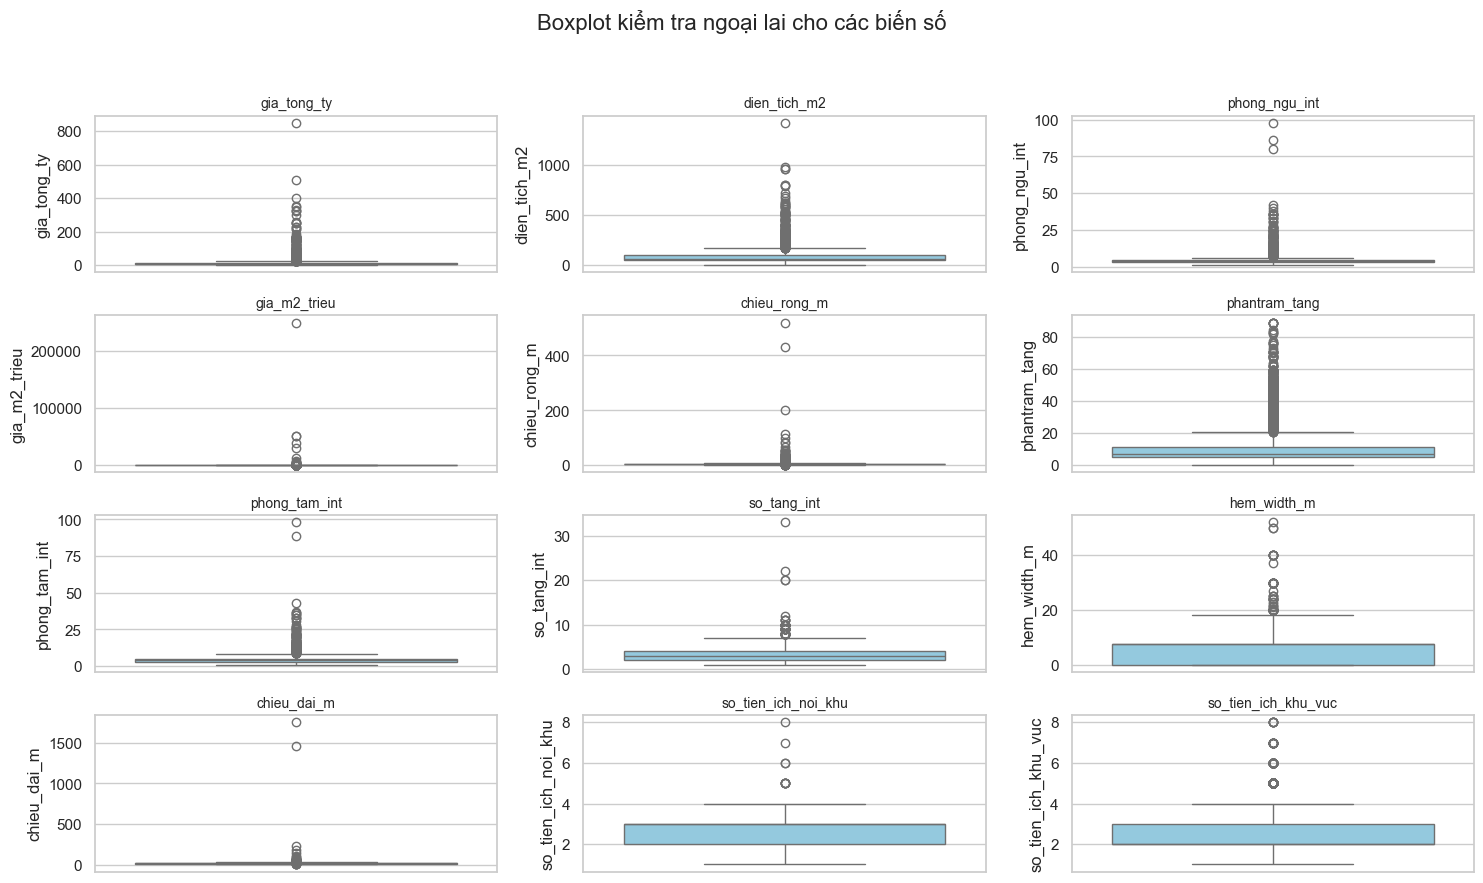

In [100]:
boxplot_ngoailai(df_nha_filtered,numeric_col_nha)

In [101]:
df_nha = df_nha_filtered

In [102]:
for col in numeric_col_nha:
    print(col+ ' : ', df_nha[col].skew()) # 'gia_m2_trieu', 'chieu_rong_m', 'chieu_dai_m' cần đc xử lý thêm

gia_tong_ty :  12.213756371320203
dien_tich_m2 :  4.748489011354183
phong_ngu_int :  10.20144754991678
gia_m2_trieu :  62.48113147472049
chieu_rong_m :  37.171162662399055
phantram_tang :  2.4696187358121384
phong_tam_int :  11.443717348702847
so_tang_int :  2.8490218091105404
hem_width_m :  1.9153440576296275
chieu_dai_m :  47.960715024302964
so_tien_ich_noi_khu :  -0.5608389628560981
so_tien_ich_khu_vuc :  1.3211314395611427


In [103]:
numeric_col_nha

['gia_tong_ty',
 'dien_tich_m2',
 'phong_ngu_int',
 'gia_m2_trieu',
 'chieu_rong_m',
 'phantram_tang',
 'phong_tam_int',
 'so_tang_int',
 'hem_width_m',
 'chieu_dai_m',
 'so_tien_ich_noi_khu',
 'so_tien_ich_khu_vuc']

In [104]:
skew_nha = [x for x in numeric_col_nha if x != 'so_tien_ich_khu_vuc' and x != 'so_tien_ich_noi_khu']
for col in skew_nha:
    df_nha[f'log_{col}'] = np.log1p(df_nha[col])

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\2092056479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nha[f'log_{col}'] = np.log1p(df_nha[col])
C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\2092056479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nha[f'log_{col}'] = np.log1p(df_nha[col])
C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\2092056479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [105]:
log_nha_kd_features = [('log_' + col) for col in skew_nha]
for col in log_nha_kd_features:
    print(col + ": ", df_nha[col].skew())

log_gia_tong_ty:  0.8059204378160965
log_dien_tich_m2:  0.1562151330469571
log_phong_ngu_int:  1.3302635664598266
log_gia_m2_trieu:  0.09151053851576203
log_chieu_rong_m:  3.2023025860066734
log_phantram_tang:  0.6004969346593524
log_phong_tam_int:  1.0369282009326186
log_so_tang_int:  0.01969924830891275
log_hem_width_m:  -0.8009677596024384
log_chieu_dai_m:  0.27141846891070137


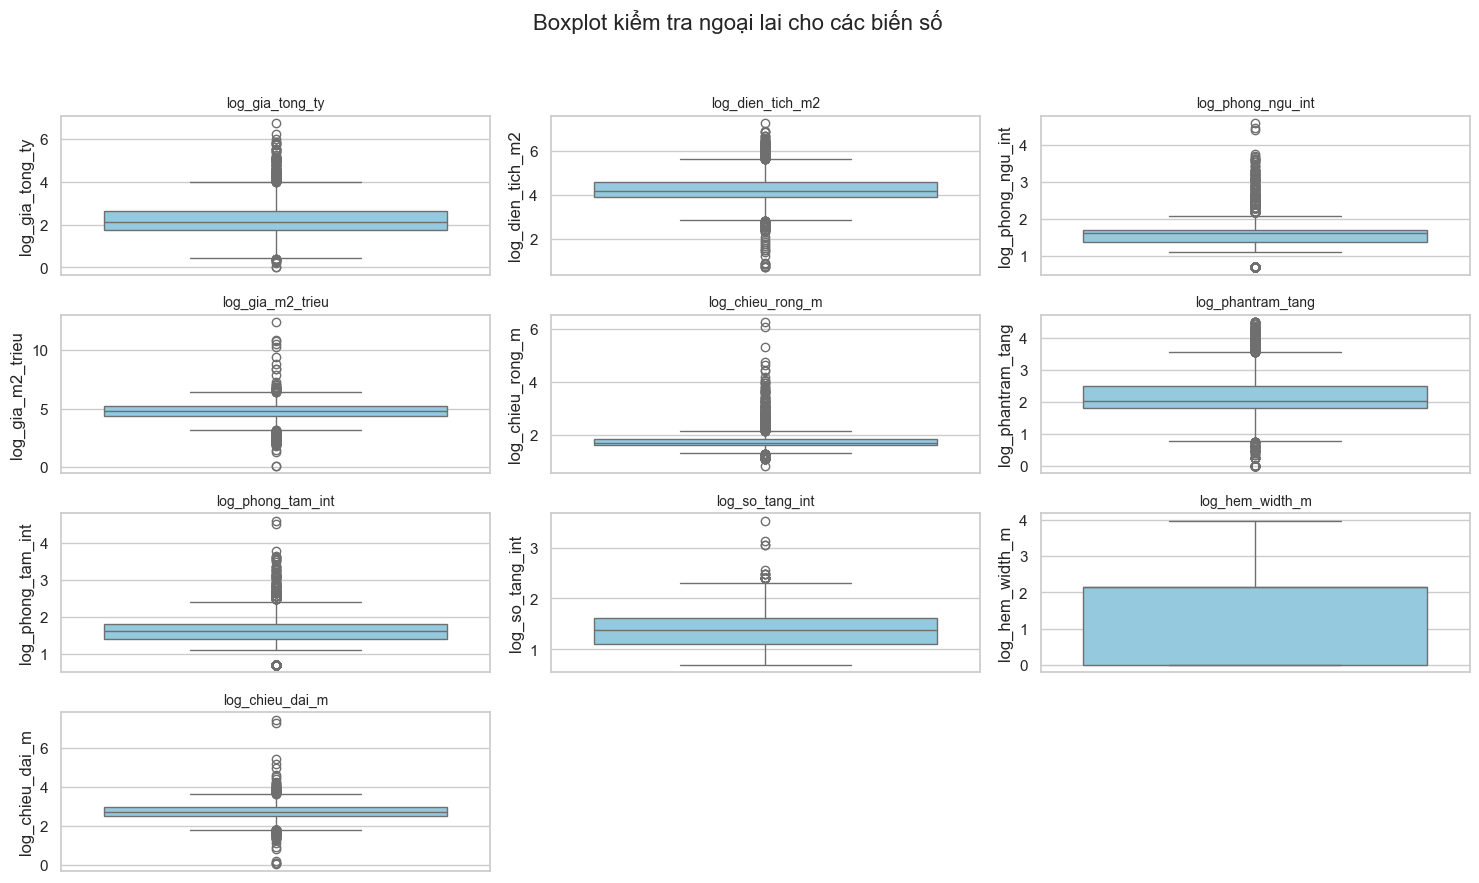

In [106]:
boxplot_ngoailai(df_nha,log_nha_kd_features)

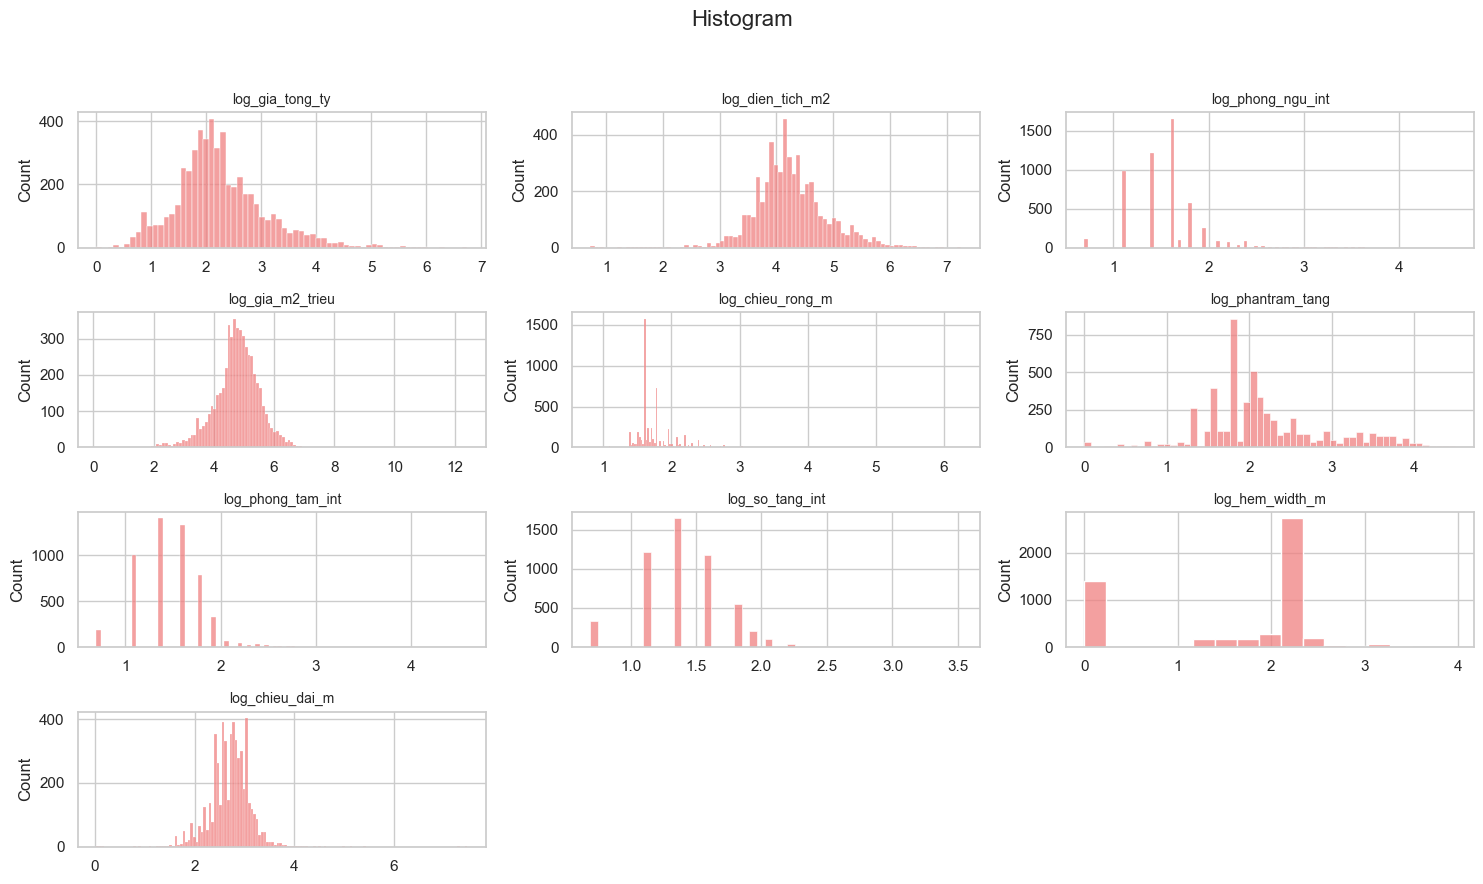

In [107]:
hist_plt(df_nha,log_nha_kd_features)

In [108]:
def scatterplot_numeric_features(data: pd.DataFrame, num_features: list[str], target_col: str):
    df = data.copy()
    num_plots = len(num_features)
    nrows, ncols = 4, 3
    total_subplots = nrows * ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 9))
    axes = axes.flatten()

    for i, col in enumerate(num_features[:total_subplots]):
        sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i], color='steelblue', alpha=0.6,hue='kieu')
        axes[i].set_title(f"{col} vs {target_col}", fontsize=10,fontweight='bold',color='red')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)

    for j in range(num_plots, total_subplots):
        fig.delaxes(axes[j])

    fig.suptitle(f"Scatterplot mối quan hệ với {target_col}", fontsize=16,fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [109]:
numeric_col_nha

['gia_tong_ty',
 'dien_tich_m2',
 'phong_ngu_int',
 'gia_m2_trieu',
 'chieu_rong_m',
 'phantram_tang',
 'phong_tam_int',
 'so_tang_int',
 'hem_width_m',
 'chieu_dai_m',
 'so_tien_ich_noi_khu',
 'so_tien_ich_khu_vuc']

In [110]:
log_canho_kd_features.append('so_tien_ich_khu_vuc')
log_nha_kd_features.append('so_tien_ich_noi_khu')
log_nha_kd_features.append('so_tien_ich_khu_vuc')

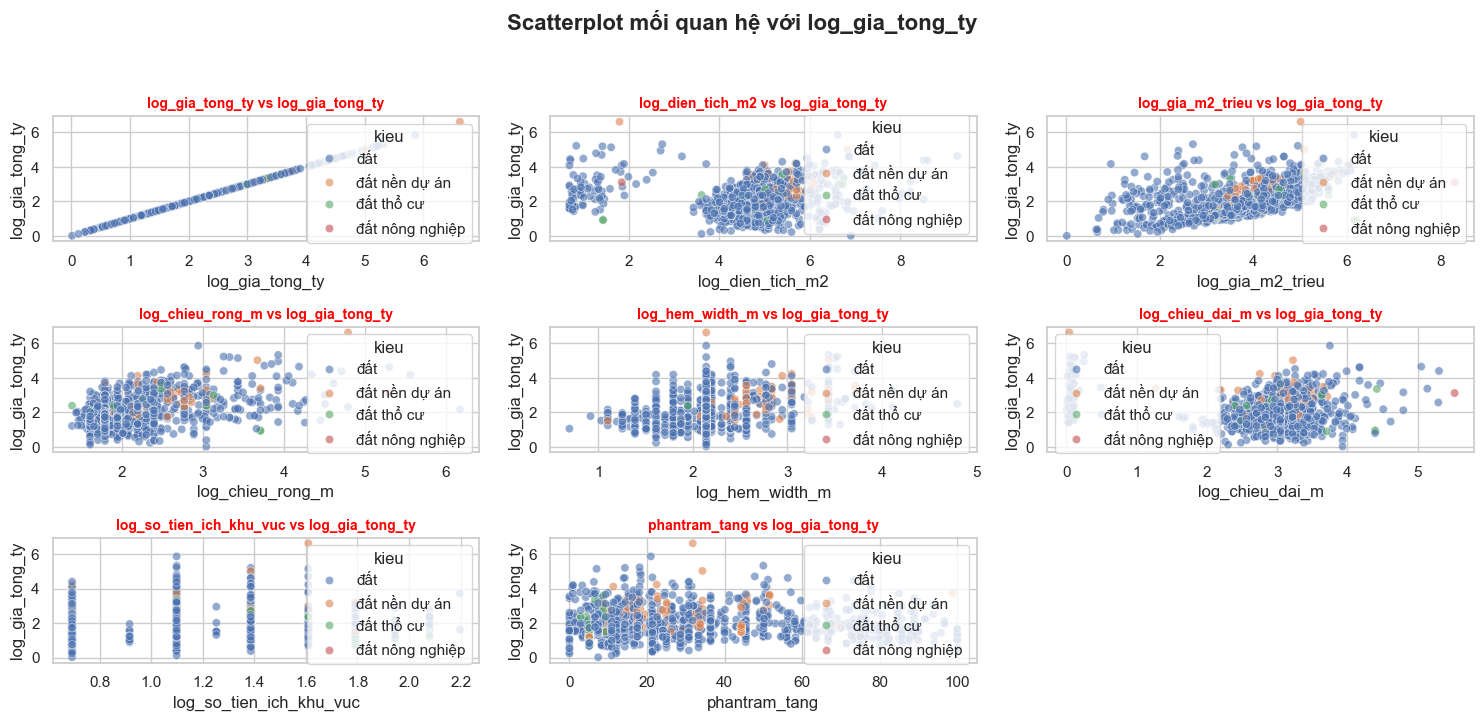

In [111]:
scatterplot_numeric_features(df_dat,log_dat_kd_features,'log_gia_tong_ty')

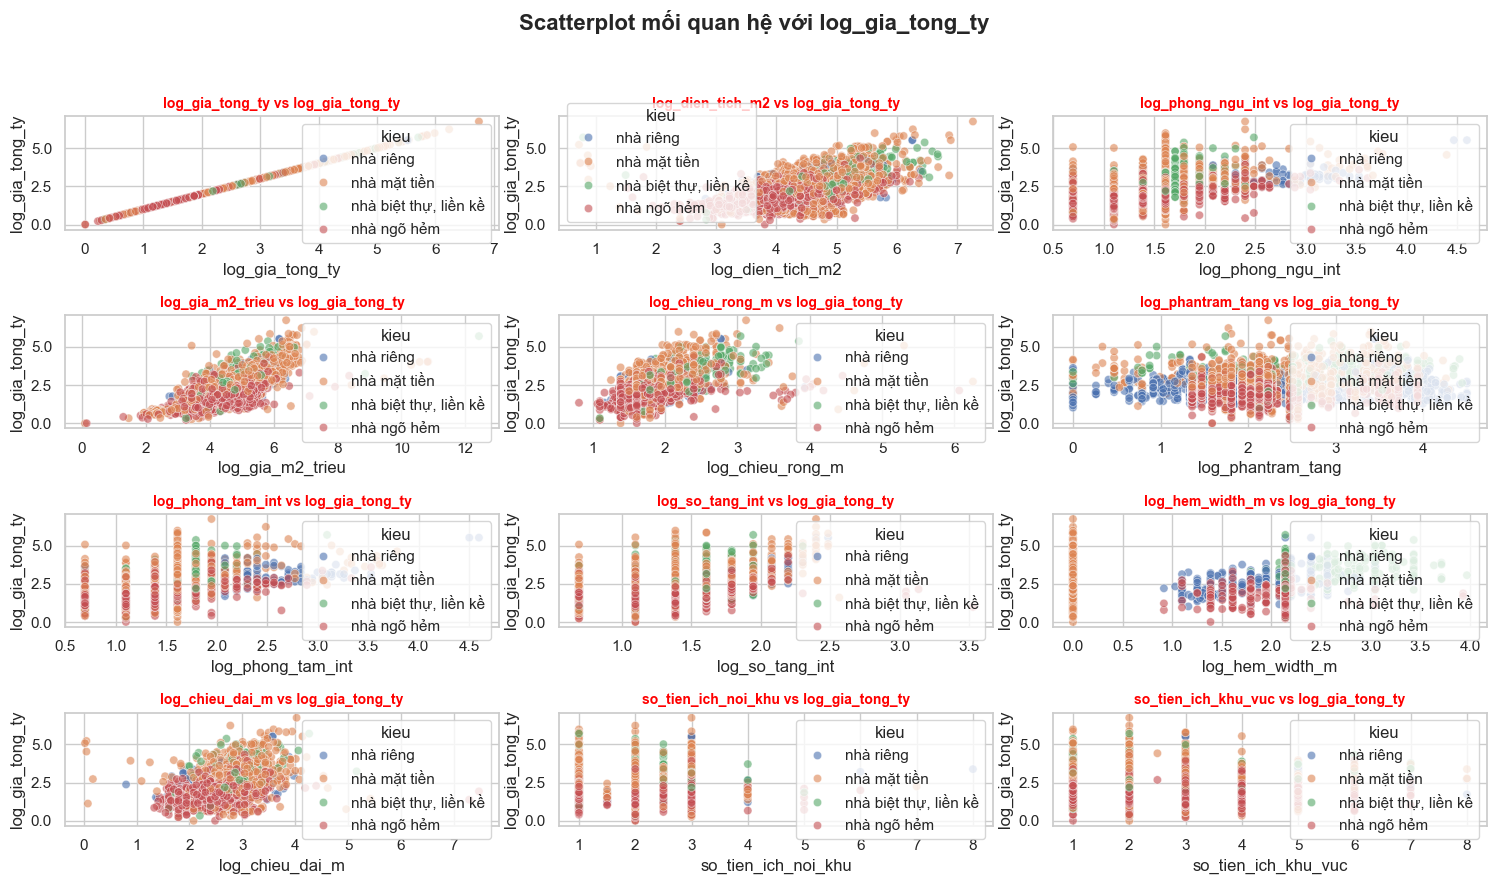

In [112]:
scatterplot_numeric_features(df_nha,log_nha_kd_features,'log_gia_tong_ty')

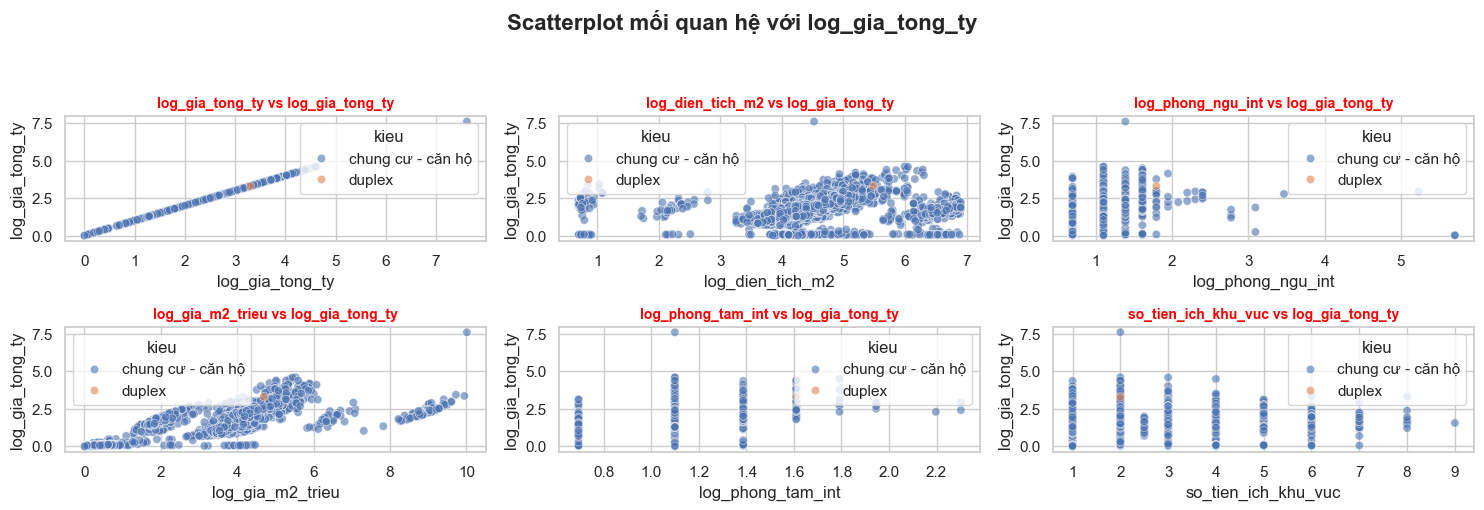

In [113]:
scatterplot_numeric_features(df_canho,log_canho_kd_features,'log_gia_tong_ty')

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

X_vif_dat = df_dat[['log_dien_tich_m2', 'log_chieu_rong_m', 'log_chieu_dai_m', 'log_hem_width_m',
        'log_gia_m2_trieu', 'phantram_tang', 'log_so_tien_ich_khu_vuc']]

X_const_dat = add_constant(X_vif_dat)
vif_dat = pd.DataFrame()
vif_dat["Variable"] = X_vif_dat.columns
vif_dat["VIF"] = [variance_inflation_factor(X_const_dat.values, i+1) for i in range(len(X_vif_dat.columns))]
print(vif_dat)

                  Variable       VIF
0         log_dien_tich_m2  7.051039
1         log_chieu_rong_m  2.026106
2          log_chieu_dai_m  8.421469
3          log_hem_width_m  1.176378
4         log_gia_m2_trieu  1.260297
5            phantram_tang  1.083380
6  log_so_tien_ich_khu_vuc  1.025219


In [115]:
df_dat.drop(columns={'log_chieu_dai_m'},inplace=True)

In [116]:
X_vif_nha = df_nha[['log_dien_tich_m2','log_phong_ngu_int','log_gia_m2_trieu','log_chieu_rong_m','log_phantram_tang','log_phong_tam_int','log_so_tang_int','log_hem_width_m','log_chieu_dai_m','so_tien_ich_noi_khu','so_tien_ich_khu_vuc']]

X_const_nha = add_constant(X_vif_nha)
vif_nha = pd.DataFrame()
vif_nha["Variable"] = X_vif_nha.columns
vif_nha["VIF"] = [variance_inflation_factor(X_const_nha.values, i+1) for i in range(len(X_vif_nha.columns))]
print(vif_nha)

               Variable       VIF
0      log_dien_tich_m2  3.254517
1     log_phong_ngu_int  3.000330
2      log_gia_m2_trieu  1.696782
3      log_chieu_rong_m  1.674773
4     log_phantram_tang  1.098559
5     log_phong_tam_int  3.147029
6       log_so_tang_int  1.926083
7       log_hem_width_m  1.061369
8       log_chieu_dai_m  2.186769
9   so_tien_ich_noi_khu  1.027908
10  so_tien_ich_khu_vuc  1.007880


In [117]:
log_canho_kd_features = ['log_gia_tong_ty','log_dien_tich_m2','log_phong_ngu_int','log_gia_m2_trieu','log_phong_tam_int','so_tien_ich_khu_vuc']

In [118]:
X_vif_canho = df_canho[['log_dien_tich_m2','log_phong_ngu_int','log_gia_m2_trieu','log_phong_tam_int','so_tien_ich_khu_vuc']]

X_const_canho = add_constant(X_vif_canho)
vif_canho = pd.DataFrame()
vif_canho["Variable"] = X_vif_canho.columns
vif_canho["VIF"] = [variance_inflation_factor(X_const_canho.values, i+1) for i in range(len(X_vif_canho.columns))]
print(vif_canho)

              Variable       VIF
0     log_dien_tich_m2  1.772317
1    log_phong_ngu_int  1.265260
2     log_gia_m2_trieu  1.736322
3    log_phong_tam_int  1.260956
4  so_tien_ich_khu_vuc  1.003593


In [119]:
log_dat_kd_features.remove('log_chieu_dai_m')

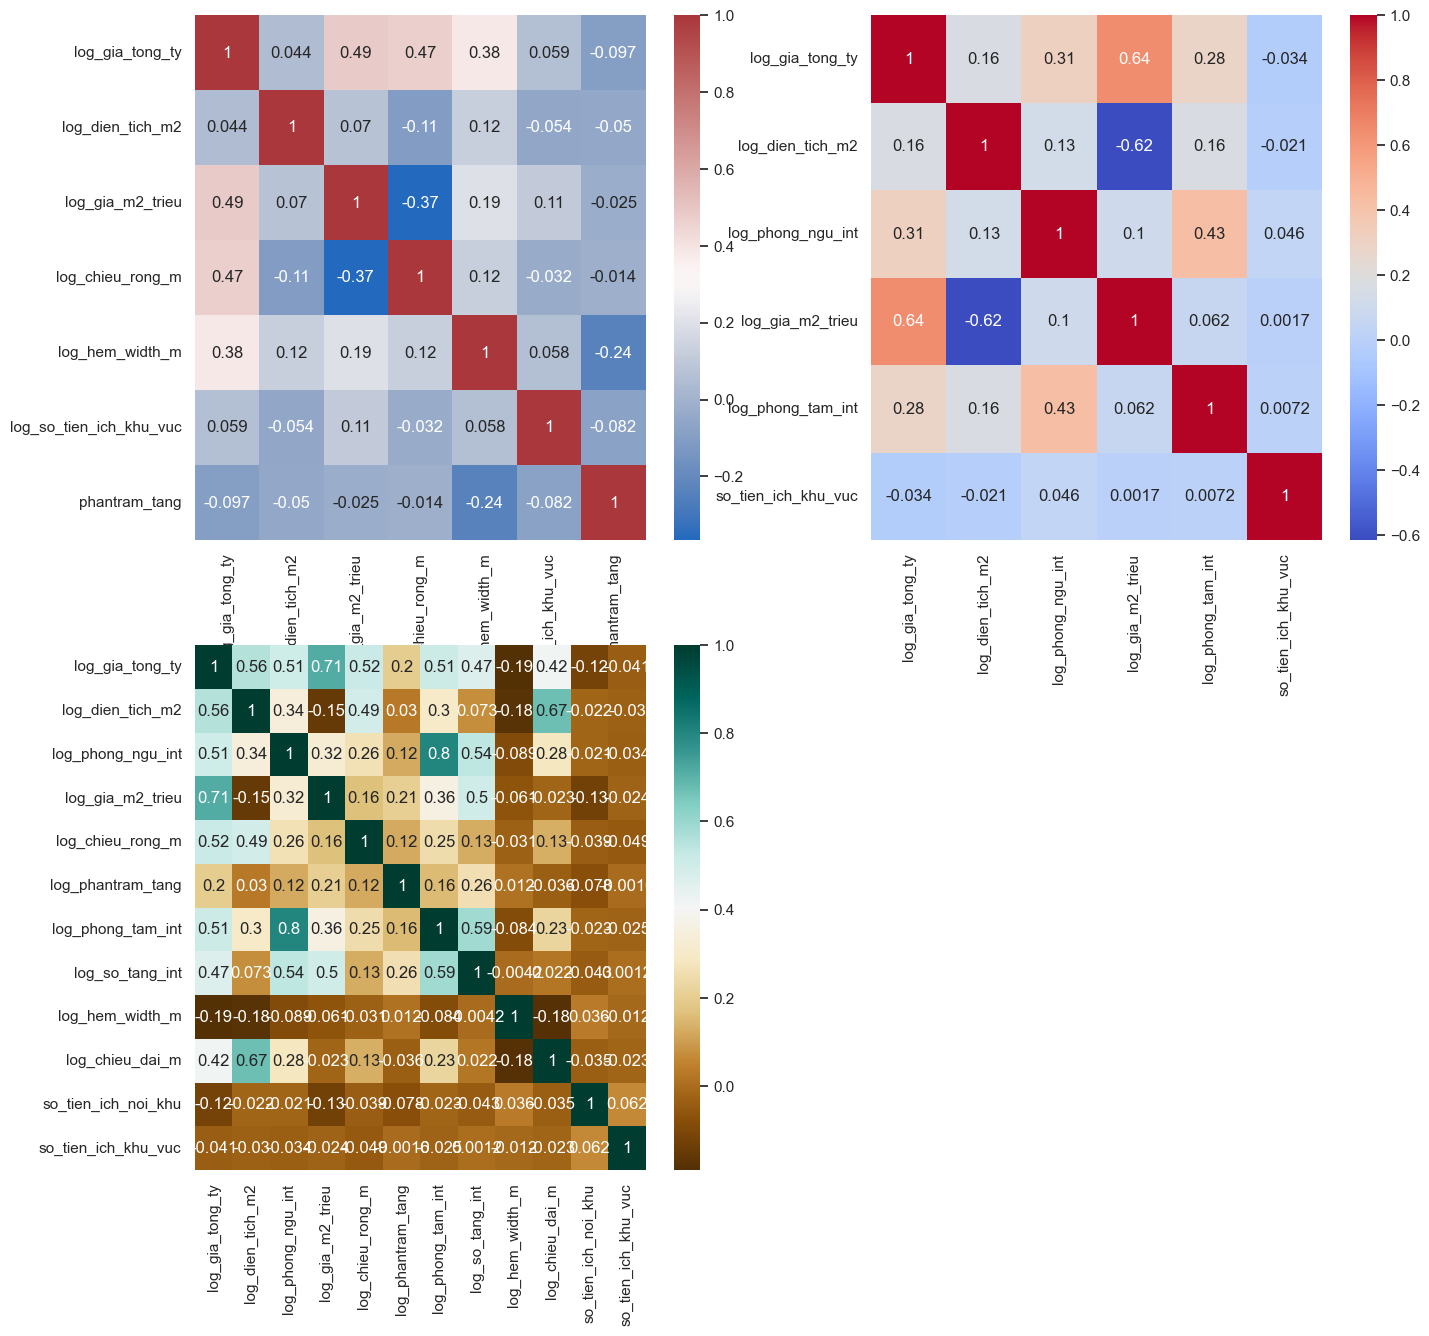

In [120]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 15))
sns.heatmap(ax=axes[0][0],data=df_dat[log_dat_kd_features].corr(), annot=True, cmap='vlag')
sns.heatmap(ax=axes[0][1],data=df_canho[log_canho_kd_features].corr(), annot=True, cmap='coolwarm')
sns.heatmap(ax=axes[1][0],data=df_nha[log_nha_kd_features].corr(),annot=True,cmap='BrBG')
fig.delaxes(axes[1][1])

In [121]:
df_dat.select_dtypes('number').columns

Index(['gia_tong_ty', 'dien_tich_m2', 'gia_m2_trieu', 'chieu_rong_m',
       'phantram_tang', 'hem_width_m', 'chieu_dai_m', 'so_tien_ich_khu_vuc',
       'log_gia_tong_ty', 'log_dien_tich_m2', 'log_gia_m2_trieu',
       'log_chieu_rong_m', 'log_hem_width_m', 'log_so_tien_ich_khu_vuc'],
      dtype='object')

In [122]:
df_dat.drop(columns=['gia_tong_ty','dien_tich_m2', 'gia_m2_trieu','chieu_rong_m', 'phantram_tang','hem_width_m','chieu_dai_m','so_tien_ich_khu_vuc'],inplace=True)

In [123]:
df_nha.drop(columns=['gia_tong_ty','dien_tich_m2', 'phong_ngu_int','gia_m2_trieu','chieu_rong_m','phantram_tang','phong_tam_int','so_tang_int','hem_width_m','chieu_dai_m'],inplace=True)

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\102941726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nha.drop(columns=['gia_tong_ty','dien_tich_m2', 'phong_ngu_int','gia_m2_trieu','chieu_rong_m','phantram_tang','phong_tam_int','so_tang_int','hem_width_m','chieu_dai_m'],inplace=True)


In [124]:
log_canho_kd_features

['log_gia_tong_ty',
 'log_dien_tich_m2',
 'log_phong_ngu_int',
 'log_gia_m2_trieu',
 'log_phong_tam_int',
 'so_tien_ich_khu_vuc']

In [125]:
df_canho.drop(columns=['gia_tong_ty','dien_tich_m2','phong_ngu_int','gia_m2_trieu','phong_tam_int'],inplace=True)

In [126]:
df.columns

Index(['link', 'thanh_pho', 'quan', 'kieu', 'tieu_de', 'dia_chi',
       'gia_tong_ty', 'dien_tich_m2', 'phong_ngu_int', 'gia_m2_trieu',
       'chieu_rong_m', 'phantram_tang', 'tong_quan', 'phap_ly_chuan', 'vi_do',
       'kinh_do', 'thoi_gian_date', 'phong_tam_int', 'so_tang_int',
       'huong_chuan', 'noi_that', 'hem_width_m', 'duong', 'phuong',
       'tien_ich_khu_vuc', 'tien_ich_noi_khu', 'chieu_dai_m', 'source',
       'so_tien_ich_noi_khu', 'so_tien_ich_khu_vuc', 'nhom_bds'],
      dtype='object')

In [127]:
# df_dat.to_csv('df_dat.csv',index=False)
# df_nha.to_csv('df_nha.csv',index=False)
# df_canho.to_csv('df_canho.csv',index=False)

In [128]:
## cat features: 'thanh_pho', 'quan', 'kieu',  'phap_ly_chuan', 'huong_chuan', 'noi_that', 'duong', 'phuong'
## ordinal features: 'quan', 'kieu', 'phap_ly_chuan', 'noi_that'
## nominal features:  'thanh_pho', 'huong_chuan', 'duong', 'phuong'

In [129]:
df_dat.drop(columns={'duong'},inplace=True)
df_nha.drop(columns={'duong'},inplace=True)
df_canho.drop(columns={'duong'},inplace=True)

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\445214644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nha.drop(columns={'duong'},inplace=True)


In [130]:
df_dat.columns #không có noi_that

Index(['thanh_pho', 'quan', 'kieu', 'tong_quan', 'phap_ly_chuan',
       'thoi_gian_date', 'huong_chuan', 'phuong', 'log_gia_tong_ty',
       'log_dien_tich_m2', 'log_gia_m2_trieu', 'log_chieu_rong_m',
       'log_hem_width_m', 'log_so_tien_ich_khu_vuc'],
      dtype='object')

In [131]:
dat_ord_cols = ['quan', 'kieu', 'phap_ly_chuan']
dat_nom_cols = ['thanh_pho','huong_chuan','phuong']

In [132]:
nha_ord_cols = ['quan', 'kieu', 'phap_ly_chuan', 'noi_that']
nha_nom_cols = ['thanh_pho','huong_chuan','phuong']
canho_ord_col = ['quan', 'kieu', 'noi_that']
canho_nom_col = ['thanh_pho','phuong']

In [133]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [134]:
kieu_order_dat = ['đất nông nghiệp', 'đất', 'đất nền dự án', 'đất thổ cư']
kieu_order_nha = ['nhà riêng', 'nhà ngõ hẻm', 'nhà mặt tiền', 'nhà biệt thự, liền kề']
kieu_order_canho = ['chung cư - căn hộ', 'duplex']
phap_ly_order = ['không rõ', 'hợp đồng', 'đã có sổ', 'sổ đỏ', 'sổ đỏ/sổ hồng', 'sổ hồng']

quan_hcm_order = ['khác', 'quận 10', 'thủ đức', 'gò vấp', 'tân bình', 'phú nhuận', 'bình thạnh', 'quận 7', 'quận 3', 'quận 1']
quan_hanoi_order = ['khác', 'bắc từ liêm', 'nam từ liêm', 'thanh xuân', 'đống đa', 'cầu giấy', 'hai bà trưng', 'ba đình', 'tây hồ', 'hoàn kiếm']
quan_danang_order = ['khác', 'hòa vang', 'cẩm lệ', 'thanh khê', 'liên chiểu', 'ngũ hành sơn', 'sơn trà', 'hải châu']

noi_that_order = ['không rõ', 'bàn giao thô', 'hoàn thiện cơ bản', 'nội thất đầy đủ', 'nội thất cao cấp']

In [135]:
encoder_kieu_dat = OrdinalEncoder(categories=[kieu_order_dat])
df_dat['kieu_encoded'] = encoder_kieu_dat.fit_transform(df_dat[['kieu']])

encoder_kieu_nha = OrdinalEncoder(categories=[kieu_order_nha])
df_nha['kieu_encoded'] = encoder_kieu_nha.fit_transform(df_nha[['kieu']])

encoder_kieu_canho = OrdinalEncoder(categories=[kieu_order_canho])
df_canho['kieu_encoded'] = encoder_kieu_canho.fit_transform(df_canho[['kieu']])

encoder_phap_ly = OrdinalEncoder(categories=[phap_ly_order])
df_dat['phap_ly_encoded'] = encoder_phap_ly.fit_transform(df_dat[['phap_ly_chuan']])
df_nha['phap_ly_encoded'] = encoder_phap_ly.fit_transform(df_nha[['phap_ly_chuan']])

encoder_noi_that = OrdinalEncoder(categories=[noi_that_order])
df_nha['noi_that_encoded'] = encoder_noi_that.fit_transform(df_nha[['noi_that']])
df_canho['noi_that_encoded'] = encoder_noi_that.fit_transform(df_canho[['noi_that']])

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\1086031118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nha['kieu_encoded'] = encoder_kieu_nha.fit_transform(df_nha[['kieu']])
C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\1086031118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nha['phap_ly_encoded'] = encoder_phap_ly.fit_transform(df_nha[['phap_ly_chuan']])
C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\1086031118.py:15: SettingWithCopyWarning: 
A value is trying to be 

In [136]:
def encode_quan(df, city_col='city', quan_col='quan'):
    # Tạo mapping encode cho từng thành phố
    mapping = {
        'hồ chí minh': {q: i for i, q in enumerate(quan_hcm_order)},
        'hà nội': {q: i for i, q in enumerate(quan_hanoi_order)},
        'đà nẵng': {q: i for i, q in enumerate(quan_danang_order)}
    }
    # Hàm encode từng hàng dựa trên city và quan
    def encode_row(row):
        city = row[city_col]
        quan = row[quan_col]
        city_map = mapping.get(city)
        if city_map is None:
            return 0  # Nếu city không có trong mapping, trả về -1 hoặc giá trị mặc định
        return city_map.get(quan, city_map.get('khác', 0))  # Nếu quận không có trong list, dùng 'khác'
    
    # Tạo cột mới encoded
    df[quan_col + '_encoded'] = df.apply(encode_row, axis=1)
    return df

In [137]:
df_dat = encode_quan(df=df_dat,city_col='thanh_pho',quan_col='quan')
df_nha = encode_quan(df=df_nha,city_col='thanh_pho',quan_col='quan')
df_canho = encode_quan(df=df_canho,city_col='thanh_pho',quan_col='quan')

C:\Users\Laptop-HP\AppData\Local\Temp\ipykernel_8772\1344754602.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[quan_col + '_encoded'] = df.apply(encode_row, axis=1)


#### Kiểm định hướng nhà có ảnh hưởng nhiều đến giá hay không để encode theo nominal hay ordinal
| Kết quả `p-value` | Kết luận                                                                             |
| ----------------- | ------------------------------------------------------------------------------------ |
| `< 0.05`          | Hướng nhà **có ảnh hưởng đáng kể** đến (log) giá nhà                                 |
| `≥ 0.05`          | Hướng nhà **không ảnh hưởng rõ rệt** đến giá nhà (không có bằng chứng thống kê mạnh) |

In [138]:
# Kiểm định hướng nhà có ảnh hưởng nhiều đến giá hay không để encode theo nominal hay ordinal
from scipy.stats import f_oneway
from scipy.stats import levene

df_dat_valid = df_dat[['huong_chuan', 'log_gia_tong_ty']]
df_nha_valid = df_nha[['huong_chuan', 'log_gia_tong_ty']]

groups_dat = [group['log_gia_tong_ty'].values for name, group in df_dat_valid.groupby('huong_chuan')]
groups_nha = [group['log_gia_tong_ty'].values for name, group in df_nha_valid.groupby('huong_chuan')]

f_stat_dat, p_value_dat = f_oneway(*groups_dat)
f_stat_nha, p_value_nha = f_oneway(*groups_nha)

print('------ ĐẤT ------')
print(f"F-statistic: {f_stat_dat:.6f}")
print(f"P-value: {p_value_dat:.6f}")
levene_stat_dat, levene_p_dat = levene(*groups_dat)
print(f"Levene test p-value: {levene_p_dat:.6f}")
print()
print('------ NHÀ ------')
print(f"F-statistic: {f_stat_nha:.6f}")
print(f"P-value: {p_value_nha:.6f}")
levene_stat_nha, levene_p_nha = levene(*groups_nha)
print(f"Levene test p-value: {levene_p_nha:.6f}")

------ ĐẤT ------
F-statistic: 3.008555
P-value: 0.002377
Levene test p-value: 0.086893

------ NHÀ ------
F-statistic: 32.095503
P-value: 0.000000
Levene test p-value: 0.000001


Kết luận: Kiểm định ANOVA cho thấy đối với cả nhà và đất, hướng có ảnh hưởng đáng kể. 
- Hướng đất có ảnh hưởng đáng kể đến giá đất (log), và giả định của ANOVA được thỏa mãn (levene test p-value) → ANOVA tin cậy.
- Đối với nhà p-value = 0.000001 → < 0.05 ⇒ phương sai không đồng nhất → Giả định của ANOVA bị vi phạm, nên kết quả ANOVA chuẩn có thể không hoàn toàn đáng tin.

Hướng nhà có ảnh hưởng đáng kể đến giá nhà (đã được xác nhận qua ANOVA).
Một số hướng như Nam, Đông Nam, Đông Bắc có thể mang lại giá trị thị trường cao hơn.

In [139]:
def plot_boxplot_by_direction(df, title=''):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='huong_chuan', y='log_gia_tong_ty', data=df, order=sorted(df['huong_chuan'].unique()))
    plt.xticks(rotation=45)
    plt.title(f'Boxplot giá (log) theo hướng - {title}')
    plt.xlabel('Hướng nhà')
    plt.ylabel('Log(Giá)')
    plt.tight_layout()
    plt.show()

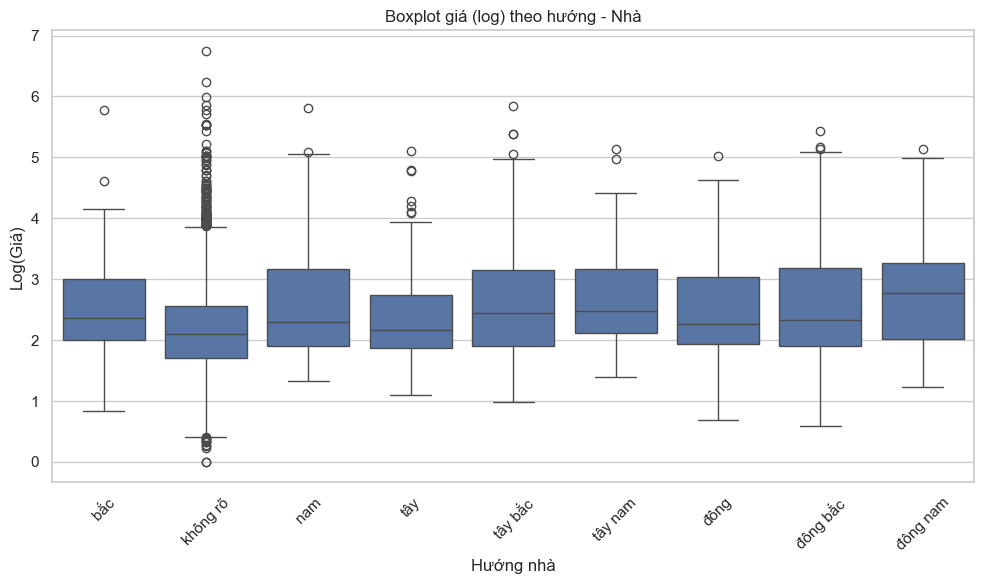

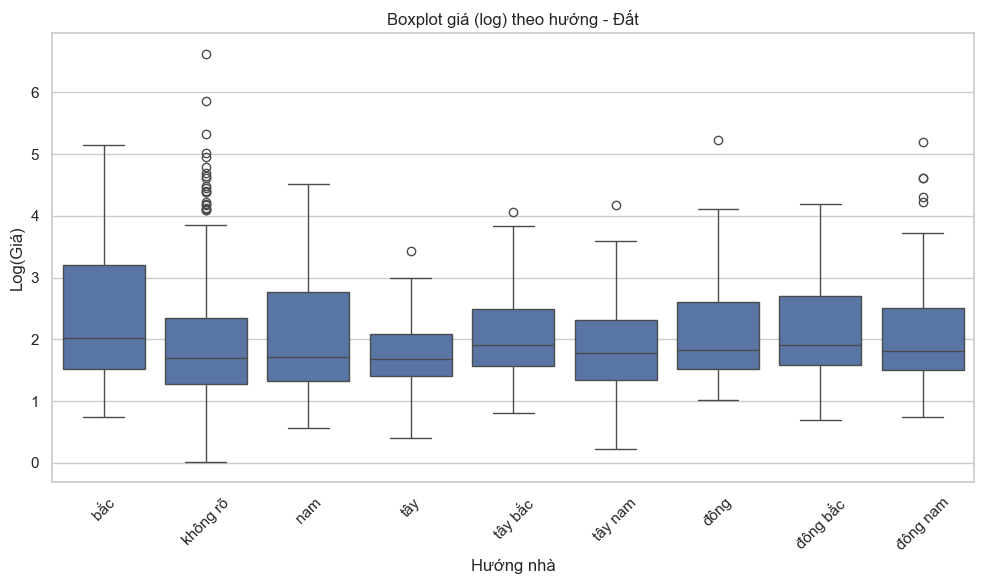

In [140]:
plot_boxplot_by_direction(df_nha, title='Nhà')
plot_boxplot_by_direction(df_dat, title='Đất')

In [141]:
def encode_huong_chuan_onehot(df: pd.DataFrame) -> pd.DataFrame:
    ohe = OneHotEncoder(drop='first', sparse_output=False)
    huong_encoded = ohe.fit_transform(df[['huong_chuan']])
    huong_cols = ohe.get_feature_names_out(['huong_chuan'])

    df_huong = pd.DataFrame(huong_encoded, columns=[col.replace('huong_chuan_', 'huong_') for col in huong_cols], index=df.index)
    df = pd.concat([df.drop(columns=['huong_chuan']), df_huong], axis=1)
    return df

In [142]:

def encode_huong_chuan_ordinal(df: pd.DataFrame) -> pd.DataFrame:
    
    huong_order = ['không rõ','tây', 'tây nam', 'bắc', 'tây bắc', 'đông bắc', 'đông', 'nam', 'đông nam']
    encoder = OrdinalEncoder(categories=[huong_order], handle_unknown='use_encoded_value', unknown_value=-1)
    df['huong_chuan_encoded'] = encoder.fit_transform(df[['huong_chuan']])
    df = df.drop(columns=['huong_chuan'])
    return df


In [143]:
df.loc[df['thanh_pho'] == 'đà nẵng']

,link,thanh_pho,quan,kieu,tieu_de,dia_chi,gia_tong_ty,dien_tich_m2,phong_ngu_int,gia_m2_trieu,...,hem_width_m,duong,phuong,tien_ich_khu_vuc,tien_ich_noi_khu,chieu_dai_m,source,so_tien_ich_noi_khu,so_tien_ich_khu_vuc,nhom_bds
2915,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,đà nẵng,ngũ hành sơn,đất nền dự án,lô góc 2 mặt tiền đường nguyễn quý anh và vùng...,"dự án phú mỹ an, đường nguyễn quý anh, phường ...",8.90,200.0,NaN,44.50,...,7.5,khu đô thị phú mỹ an,phường hòa hải,công viên,NaN,NaN,bất động sản,NaN,1.0,đất
2916,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,đà nẵng,ngũ hành sơn,đất nền dự án,"bán đất đường vùng trung 4, khu phú mỹ an, đà ...","dự án phú mỹ an, đường vùng trung 4, phường hò...",9.00,300.0,NaN,30.00,...,7.5,khu đô thị phú mỹ an,phường hòa hải,khu dân cư,NaN,NaN,bất động sản,NaN,1.0,đất
2917,https://batdongsan.com.vn/ban-dat-duong-nguyen...,đà nẵng,hòa vang,đất,"bán đất hòa liên đường chính 7m5 kinh doanh, d...","đường nguyễn tất thành, xã hòa liên, hòa vang,...",2.35,127.5,NaN,18.43,...,7.5,đường nguyễn tất thành,xã hòa liên,bến xe,NaN,NaN,bất động sản,NaN,1.0,đất
2918,https://batdongsan.com.vn/ban-dat-duong-tran-b...,đà nẵng,ngũ hành sơn,đất,bán lô đất biển an thượng - đối lưng trần bạch...,"đường trần bạch đằng, phường mỹ an, ngũ hành s...",26.70,162.0,NaN,164.82,...,5.5,đường trần bạch đằng,phường mỹ an,NaN,NaN,NaN,bất động sản,NaN,NaN,đất
2919,https://batdongsan.com.vn/ban-dat-nen-du-an-du...,đà nẵng,ngũ hành sơn,đất nền dự án,"bán lô đất biển 2 mặt tiền trước sau, đường 10...","khu đô thị saphia, võ nguyên giáp, hòa hải, ng...",12.60,140.0,NaN,90.00,...,10.5,khu đô thị saphia,NaN,công viên,NaN,NaN,bất động sản,NaN,1.0,đất
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17670,https://www.nhatot.com/mua-ban-bat-dong-san/12...,đà nẵng,hòa vang,đất,mua bán đất huyện hòa vang,"605, xã hòa tiến, huyện hòa vang, đà nẵng",1.50,100.0,NaN,15.00,...,NaN,605,xã hòa tiến,khu dân cư,NaN,NaN,nhà tốt,NaN,1.0,đất
17701,https://www.nhatot.com/mua-ban-bat-dong-san/12...,đà nẵng,hòa vang,đất,mua bán đất huyện hòa vang,"dương sơn, xã hòa châu, huyện hòa vang, đà nẵng",1.89,180.0,NaN,10.50,...,NaN,dương sơn,xã hòa châu,NaN,NaN,33.00,nhà tốt,NaN,NaN,đất
17747,https://www.nhatot.com/mua-ban-bat-dong-san/12...,đà nẵng,ngũ hành sơn,đất,mua bán đất quận ngũ hành sơn,"đường mai đăng chơn, phường hoà quý, quận ngũ ...",7.20,200.0,NaN,36.00,...,NaN,đường mai đăng chơn,phường hoà quý,chợ; siêu thị; đại học,NaN,20.00,nhà tốt,NaN,3.0,đất
17754,https://www.nhatot.com/mua-ban-bat-dong-san/12...,đà nẵng,liên chiểu,đất,mua bán đất quận liên chiểu,"đường đà sơn, phường hòa khánh nam, quận liên ...",2.29,70.0,NaN,32.71,...,NaN,đường đà sơn,phường hòa khánh nam,bến xe; chợ; đại học,NaN,17.31,nhà tốt,NaN,3.0,đất


In [144]:
def encode_thanh_pho_quan_onehot(df: pd.DataFrame) -> pd.DataFrame:
    map_thanh_pho = {
        'hà nội': 'hn',
        'hồ chí minh': 'hcm',
        'đà nẵng': 'dn'
    }
    df['thanh_pho_short'] = df['thanh_pho'].map(map_thanh_pho)

    ohe = OneHotEncoder(drop='first', sparse_output=False)
    ohe_cols = ['thanh_pho_short', 'quan']
    ohe_data = ohe.fit_transform(df[ohe_cols])
    feature_names = ohe.get_feature_names_out(ohe_cols)

    df_ohe = pd.DataFrame(ohe_data, columns=[col.replace('thanh_pho_short_', '').replace('quan_', 'quan_') for col in feature_names], index=df.index)

    df = pd.concat([df.drop(columns=['thanh_pho', 'thanh_pho_short', 'quan']), df_ohe], axis=1)
    return df


In [145]:
df_n = df_nha.copy()
df_d = df_dat.copy()
df_ch = df_canho.copy()

In [146]:
df_nha = df_n.copy()
df_dat = df_d.copy()

In [147]:
df_canho = df_ch.copy()

In [148]:
df_nha = encode_huong_chuan_onehot(df_nha)
df_nha = encode_thanh_pho_quan_onehot(df_nha)

df_dat = encode_huong_chuan_ordinal(df_dat)
df_dat = encode_thanh_pho_quan_onehot(df_dat)

In [149]:
df_canho = encode_thanh_pho_quan_onehot(df_canho)

In [150]:
df_canho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7608 entries, 2 to 17512
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   kieu                 7608 non-null   object        
 1   tong_quan            7608 non-null   object        
 2   thoi_gian_date       7608 non-null   datetime64[ns]
 3   noi_that             7608 non-null   object        
 4   phuong               7608 non-null   object        
 5   so_tien_ich_khu_vuc  7608 non-null   float64       
 6   log_gia_tong_ty      7608 non-null   float64       
 7   log_dien_tich_m2     7608 non-null   float64       
 8   log_phong_ngu_int    7608 non-null   float64       
 9   log_gia_m2_trieu     7608 non-null   float64       
 10  log_phong_tam_int    7608 non-null   float64       
 11  kieu_encoded         7608 non-null   float64       
 12  noi_that_encoded     7608 non-null   float64       
 13  quan_encoded         7608 non-null   

In [151]:
df_nha.columns

Index(['kieu', 'tong_quan', 'phap_ly_chuan', 'thoi_gian_date', 'noi_that',
       'phuong', 'so_tien_ich_noi_khu', 'so_tien_ich_khu_vuc',
       'log_gia_tong_ty', 'log_dien_tich_m2', 'log_phong_ngu_int',
       'log_gia_m2_trieu', 'log_chieu_rong_m', 'log_phantram_tang',
       'log_phong_tam_int', 'log_so_tang_int', 'log_hem_width_m',
       'log_chieu_dai_m', 'kieu_encoded', 'phap_ly_encoded',
       'noi_that_encoded', 'quan_encoded', 'huong_không rõ', 'huong_nam',
       'huong_tây', 'huong_tây bắc', 'huong_tây nam', 'huong_đông',
       'huong_đông bắc', 'huong_đông nam', 'hcm', 'hn', 'quan_bình chánh',
       'quan_bình thạnh', 'quan_bình tân', 'quan_bắc từ liêm', 'quan_cầu giấy',
       'quan_cẩm lệ', 'quan_gia lâm', 'quan_gò vấp', 'quan_hai bà trưng',
       'quan_hoài đức', 'quan_hoàn kiếm', 'quan_hoàng mai', 'quan_hà đông',
       'quan_hóc môn', 'quan_hải châu', 'quan_liên chiểu', 'quan_long biên',
       'quan_mê linh', 'quan_nam từ liêm', 'quan_ngũ hành sơn', 'quan_nhà bè

In [152]:
import unicodedata
import re

def clean_column_name(name: str) -> str:
    # Bỏ dấu tiếng Việt
    name = unicodedata.normalize('NFD', name)
    name = ''.join([c for c in name if unicodedata.category(c) != 'Mn'])
    # Viết thường, thay khoảng trắng bằng _
    name = name.lower().strip().replace(' ', '_')
    # Loại bỏ ký tự đặc biệt
    name = re.sub(r'[^a-z0-9_]', '', name)
    return name

In [153]:
df_nha.columns = [clean_column_name(col) for col in df_nha.columns]
df_dat.columns = [clean_column_name(col) for col in df_dat.columns]

In [154]:
df_canho.columns = [clean_column_name(col) for col in df_canho.columns]

In [155]:
df_canho.columns # không có phap_ly_chuan, huong_chuan
## cat features: 'thanh_pho', 'quan', 'kieu',  'phap_ly_chuan', 'huong_chuan', 'noi_that', 'duong', 'phuong'
## ordinal features: 'quan', 'kieu', 'phap_ly_chuan', 'noi_that'
## nominal features:  'thanh_pho', 'huong_chuan', 'duong', 'phuong'

Index(['kieu', 'tong_quan', 'thoi_gian_date', 'noi_that', 'phuong',
       'so_tien_ich_khu_vuc', 'log_gia_tong_ty', 'log_dien_tich_m2',
       'log_phong_ngu_int', 'log_gia_m2_trieu', 'log_phong_tam_int',
       'kieu_encoded', 'noi_that_encoded', 'quan_encoded', 'hcm', 'hn',
       'quan_binh_chanh', 'quan_binh_thanh', 'quan_binh_tan',
       'quan_bac_tu_liem', 'quan_cau_giay', 'quan_gia_lam', 'quan_go_vap',
       'quan_hai_ba_trung', 'quan_hoai_uc', 'quan_hoang_mai', 'quan_ha_ong',
       'quan_hoc_mon', 'quan_hai_chau', 'quan_lien_chieu', 'quan_long_bien',
       'quan_nam_tu_liem', 'quan_ngu_hanh_son', 'quan_nha_be',
       'quan_phu_nhuan', 'quan_quan_1', 'quan_quan_10', 'quan_quan_12',
       'quan_quan_2', 'quan_quan_3', 'quan_quan_4', 'quan_quan_5',
       'quan_quan_6', 'quan_quan_7', 'quan_quan_8', 'quan_quan_9',
       'quan_son_tra', 'quan_thanh_khe', 'quan_thanh_tri', 'quan_thanh_xuan',
       'quan_thach_that', 'quan_thu_uc', 'quan_tan_binh', 'quan_tan_phu',
       'qu

In [156]:
df_nha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 1 to 17554
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kieu                 5320 non-null   object 
 1   tong_quan            5320 non-null   object 
 2   phap_ly_chuan        5320 non-null   object 
 3   thoi_gian_date       5320 non-null   object 
 4   noi_that             5320 non-null   object 
 5   phuong               5320 non-null   object 
 6   so_tien_ich_noi_khu  5320 non-null   float64
 7   so_tien_ich_khu_vuc  5320 non-null   float64
 8   log_gia_tong_ty      5320 non-null   float64
 9   log_dien_tich_m2     5320 non-null   float64
 10  log_phong_ngu_int    5320 non-null   float64
 11  log_gia_m2_trieu     5320 non-null   float64
 12  log_chieu_rong_m     5320 non-null   float64
 13  log_phantram_tang    5320 non-null   float64
 14  log_phong_tam_int    5320 non-null   float64
 15  log_so_tang_int      5320 non-null   float

In [157]:
df_nha.drop(columns=['kieu','tong_quan','phap_ly_chuan','noi_that','phuong'],inplace=True)
df_canho.drop(columns=['kieu','tong_quan','noi_that','phuong'],inplace=True)

In [158]:
def encode_thoi_gian_date(data: pd.DataFrame):

    df=data.copy()
    df['thoi_gian_date'] = pd.to_datetime(df['thoi_gian_date'], errors='coerce',format='mixed')
    df['year'] = df['thoi_gian_date'].dt.year
    df['month'] = df['thoi_gian_date'].dt.month
    df['day'] = df['thoi_gian_date'].dt.day
    df['dayofweek'] = df['thoi_gian_date'].dt.dayofweek  # 0 = Monday
    df['weekofyear'] = df['thoi_gian_date'].dt.isocalendar().week
    df['days_since'] = (df['thoi_gian_date'] - df['thoi_gian_date'].min()).dt.days

    return df

In [159]:
df_nha = encode_thoi_gian_date(df_nha)
df_dat = encode_thoi_gian_date(df_dat)
df_canho = encode_thoi_gian_date(df_canho)

In [160]:
def chuyen_type(df: pd.DataFrame, col: str):
    df[col] = df[col].astype('float')
    return df

In [161]:
df_nha = chuyen_type(df_nha, 'weekofyear')
df_dat = chuyen_type(df_dat, 'weekofyear')
df_canho = chuyen_type(df_canho, 'weekofyear')

In [162]:
df_nha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 1 to 17554
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   thoi_gian_date       5320 non-null   datetime64[ns]
 1   so_tien_ich_noi_khu  5320 non-null   float64       
 2   so_tien_ich_khu_vuc  5320 non-null   float64       
 3   log_gia_tong_ty      5320 non-null   float64       
 4   log_dien_tich_m2     5320 non-null   float64       
 5   log_phong_ngu_int    5320 non-null   float64       
 6   log_gia_m2_trieu     5320 non-null   float64       
 7   log_chieu_rong_m     5320 non-null   float64       
 8   log_phantram_tang    5320 non-null   float64       
 9   log_phong_tam_int    5320 non-null   float64       
 10  log_so_tang_int      5320 non-null   float64       
 11  log_hem_width_m      5320 non-null   float64       
 12  log_chieu_dai_m      5320 non-null   float64       
 13  kieu_encoded         5320 non-null   

In [163]:
df_nha.drop(columns='thoi_gian_date',inplace =True)
df_dat.drop(columns='thoi_gian_date',inplace =True)
df_canho.drop(columns='thoi_gian_date',inplace =True)

In [164]:
df_nha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 1 to 17554
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   so_tien_ich_noi_khu  5320 non-null   float64
 1   so_tien_ich_khu_vuc  5320 non-null   float64
 2   log_gia_tong_ty      5320 non-null   float64
 3   log_dien_tich_m2     5320 non-null   float64
 4   log_phong_ngu_int    5320 non-null   float64
 5   log_gia_m2_trieu     5320 non-null   float64
 6   log_chieu_rong_m     5320 non-null   float64
 7   log_phantram_tang    5320 non-null   float64
 8   log_phong_tam_int    5320 non-null   float64
 9   log_so_tang_int      5320 non-null   float64
 10  log_hem_width_m      5320 non-null   float64
 11  log_chieu_dai_m      5320 non-null   float64
 12  kieu_encoded         5320 non-null   float64
 13  phap_ly_encoded      5320 non-null   float64
 14  noi_that_encoded     5320 non-null   float64
 15  quan_encoded         5320 non-null   int64

In [ ]:
df_nha.to_csv('nha_on.csv')
df_dat.to_csv('dat_on.csv')
df_canho.to_csv('canho_on.csv')